<a href="https://colab.research.google.com/github/Youbadawy/BTRE_project/blob/master/6321.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%cd gdrive/MyDrive/6321_project/
!ls

/content/gdrive/MyDrive/6321_project
demand.xlsx	       max_cjk.xlsx		  patients.csv	  providers.csv
emergency_demand.xlsx  non_emergency_demand.xlsx  pjk.xlsx	  supplies.csv
encounters.csv	       observations.csv		  procedures.csv


### *Required Imports*

In [ ]:
!pip install fancyimpute
!pip install scikit-optimize
!pip install pmdarima

     |████████████████████████████████| 154 kB 6.5 MB/s 
  Created wheel for fancyimpute: filename=fancyimpute-0.7.0-py3-none-any.whl size=29899 sha256=707e8bb98751bcf36b06d3fabe2338757cdd28f2175b2e57db84537a23c32b35
  Stored in directory: /root/.cache/pip/wheels/e3/04/06/a1a7d89ef4e631ce6268ea2d8cde04f7290651c1ff1025ce68
  Created wheel for knnimpute: filename=knnimpute-0.1.0-py3-none-any.whl size=11353 sha256=433d8e71d02955c9d8fb8e0329133efef97f72e6c72b67948f38c26879b9da91
  Stored in directory: /root/.cache/pip/wheels/72/21/a8/a045cacd9838abd5643f6bfa852c0796a99d6b1494760494e0
Successfully built fancyimpute knnimpute
     |████████████████████████████████| 100 kB 2.9 MB/s 
     |████████████████████████████████| 1.4 MB 4.3 MB/s 
     |████████████████████████████████| 9.8 MB 30.5 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
#DATA ANALYSIS
from scipy.stats import norm, skew
from scipy import stats
import numpy as np
from numpy import absolute
import pandas as pd
import statsmodels.api as sm
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from fancyimpute import KNN

#MODEL SELECTION
from xgboost.sklearn import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.svm import SVR
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import BayesianRidge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error


#MODEL EVALUATION AND IMPROVEMENTS
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import f1_score, precision_score, recall_score, fbeta_score
from sklearn.metrics import classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.metrics import make_scorer, recall_score, log_loss
from sklearn.metrics import average_precision_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from skopt import BayesSearchCV
import pmdarima as pm


#DATA VISUALIZATION
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib.ticker as mtick
import matplotlib
from IPython.display import display
from pandas.plotting import scatter_matrix

%matplotlib inline
color = sns.color_palette()
pd.options.display.max_columns = None

In [ ]:
pd.set_option("Display.Max_Columns", None)

# Data Description

In [ ]:
import os
import re

basepath = "./"
entries = os.listdir(basepath)
print(entries)

dataframes = {}
for i in entries:
  if ".csv" in  i:
    dataframes[i] = pd.read_csv(basepath+i)

for i in dataframes:
  name = re.findall("(\w*).csv",i)
  locals()[name[0]] = dataframes.get(i)
  locals()[name[0]+"_orginal"] = dataframes.get(i)

['supplies.csv', 'patients.csv', 'encounters.csv', 'procedures.csv', 'observations.csv', 'providers.csv', 'demand.xlsx', 'emergency_demand.xlsx', 'non_emergency_demand.xlsx', 'pjk.xlsx', 'max_cjk.xlsx']


In [ ]:
patients_original = patients_orginal.rename(columns={"Id":"PATIENT"})

OBSERVATIONS AND PROCEDURES UNNECESSARY

In [ ]:
print(supplies, encounters, procedures, observations, patients)

            DATE                               PATIENT  \
0     2021-01-26  5ed07e24-b554-06fd-b3ae-d8315b8e7502   
1     2021-01-26  5ed07e24-b554-06fd-b3ae-d8315b8e7502   
2     2021-01-26  5ed07e24-b554-06fd-b3ae-d8315b8e7502   
3     2021-01-26  5ed07e24-b554-06fd-b3ae-d8315b8e7502   
4     2021-01-26  5ed07e24-b554-06fd-b3ae-d8315b8e7502   
...          ...                                   ...   
1725  2021-01-21  ff388a16-9495-67c1-a782-4d46193dd935   
1726  2021-01-21  ff388a16-9495-67c1-a782-4d46193dd935   
1727  2021-01-21  ff388a16-9495-67c1-a782-4d46193dd935   
1728  2021-01-21  ff388a16-9495-67c1-a782-4d46193dd935   
1729  2021-01-21  ff388a16-9495-67c1-a782-4d46193dd935   

                                 ENCOUNTER       CODE  \
0     11ea091e-77f5-c8ca-6102-1ed2bcc86997  409534002   
1     11ea091e-77f5-c8ca-6102-1ed2bcc86997  713779008   
2     11ea091e-77f5-c8ca-6102-1ed2bcc86997  469673003   
3     11ea091e-77f5-c8ca-6102-1ed2bcc86997  706724001   
4     11ea091e-77f

In [ ]:
#data visualization
print(supplies.describe())
print(encounters.describe())
print(procedures.describe())
print(observations.describe())
print(patients.describe())

               CODE     QUANTITY
count  1.730000e+03  1730.000000
mean   5.264901e+08     8.361272
std    1.348317e+08     9.534183
min    1.710200e+07     1.000000
25%    4.193430e+08     2.000000
50%    4.696730e+08     2.000000
75%    7.067240e+08    12.000000
max    8.271490e+08    44.000000
               CODE  BASE_ENCOUNTER_COST  TOTAL_CLAIM_COST  PAYER_COVERAGE  \
count  5.965500e+04         59655.000000      59655.000000    59655.000000   
mean   2.594736e+08           112.679821       3868.630547     1086.996050   
std    1.528790e+08            24.082032      12908.209119     6835.740514   
min    1.505002e+06            77.490000          0.000000        0.000000   
25%    1.626730e+08            77.490000        129.160000        0.000000   
50%    1.853470e+08           129.160000        786.330000        0.000000   
75%    3.909060e+08           129.160000       1527.250000       29.990000   
max    7.029270e+08           129.160000     987221.380000   484892.620000   



In [ ]:
#data visualization
print(supplies.info())
print(encounters.info())
print(procedures.info())
print(observations.info())
print(patients.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1730 entries, 0 to 1729
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   DATE         1730 non-null   object
 1   PATIENT      1730 non-null   object
 2   ENCOUNTER    1730 non-null   object
 3   CODE         1730 non-null   int64 
 4   DESCRIPTION  1730 non-null   object
 5   QUANTITY     1730 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 81.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59655 entries, 0 to 59654
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   59655 non-null  object 
 1   START                59655 non-null  object 
 2   STOP                 59655 non-null  object 
 3   PATIENT              59655 non-null  object 
 4   ORGANIZATION         59655 non-null  object 
 5   PROVIDER             59655 non-null  object 
 

In [ ]:
#Group by data types (backup) 'supplies.csv', 'encounters.csv', 'procedures.csv', 'observations.csv'
print(supplies.columns.to_series().groupby(supplies.dtypes).groups)
print(encounters.columns.to_series().groupby(encounters.dtypes).groups)
print(procedures.columns.to_series().groupby(procedures.dtypes).groups)
print(observations.columns.to_series().groupby(observations.dtypes).groups)
print(patients.columns.to_series().groupby(patients.dtypes).groups)

{int64: ['CODE', 'QUANTITY'], object: ['DATE', 'PATIENT', 'ENCOUNTER', 'DESCRIPTION']}
{int64: ['CODE'], float64: ['BASE_ENCOUNTER_COST', 'TOTAL_CLAIM_COST', 'PAYER_COVERAGE', 'REASONCODE'], object: ['Id', 'START', 'STOP', 'PATIENT', 'ORGANIZATION', 'PROVIDER', 'PAYER', 'ENCOUNTERCLASS', 'DESCRIPTION', 'REASONDESCRIPTION']}
{int64: ['CODE'], float64: ['BASE_COST', 'REASONCODE'], object: ['START', 'STOP', 'PATIENT', 'ENCOUNTER', 'DESCRIPTION', 'REASONDESCRIPTION']}
{object: ['DATE', 'PATIENT', 'ENCOUNTER', 'CATEGORY', 'CODE', 'DESCRIPTION', 'VALUE', 'UNITS', 'TYPE']}
{float64: ['ZIP', 'LAT', 'LON', 'HEALTHCARE_EXPENSES', 'HEALTHCARE_COVERAGE'], object: ['Id', 'BIRTHDATE', 'DEATHDATE', 'SSN', 'DRIVERS', 'PASSPORT', 'PREFIX', 'FIRST', 'LAST', 'SUFFIX', 'MAIDEN', 'MARITAL', 'RACE', 'ETHNICITY', 'GENDER', 'BIRTHPLACE', 'ADDRESS', 'CITY', 'STATE', 'COUNTY']}


In [ ]:
#Check for NA values

print("SUPPLIES:\n",supplies.isna().any())
print("ENCOUNTERS:\n",encounters.isna().any())
print("PROCEDURES:\n",procedures.isna().any())
print("OBSERVATIONS:\n",observations.isna().any())
print("PATIENTS:\n",patients.isna().any())

SUPPLIES:
 DATE           False
PATIENT        False
ENCOUNTER      False
CODE           False
DESCRIPTION    False
QUANTITY       False
dtype: bool
ENCOUNTERS:
 Id                     False
START                  False
STOP                   False
PATIENT                False
ORGANIZATION           False
PROVIDER               False
PAYER                  False
ENCOUNTERCLASS         False
CODE                   False
DESCRIPTION            False
BASE_ENCOUNTER_COST    False
TOTAL_CLAIM_COST       False
PAYER_COVERAGE         False
REASONCODE              True
REASONDESCRIPTION       True
dtype: bool
PROCEDURES:
 START                False
STOP                 False
PATIENT              False
ENCOUNTER            False
CODE                 False
DESCRIPTION          False
BASE_COST            False
REASONCODE            True
REASONDESCRIPTION     True
dtype: bool
OBSERVATIONS:
 DATE           False
PATIENT        False
ENCOUNTER       True
CATEGORY        True
CODE           False
DES

In [ ]:
#Check for NA values
print("SUPPLIES:\n",supplies.shape)
print("ENCOUNTERS:\n",encounters.shape)
print("PROCEDURES:\n",procedures.shape)
print("OBSERVATIONS:\n",observations.shape)
print("PATIENTS:\n",patients.shape)

SUPPLIES:
 (1730, 6)
ENCOUNTERS:
 (59655, 15)
PROCEDURES:
 (83586, 9)
OBSERVATIONS:
 (525870, 9)
PATIENTS:
 (1149, 25)


In [ ]:
procedures = procedures.drop(["REASONCODE","CODE","REASONDESCRIPTION"], axis=1)
procedures

,START,STOP,PATIENT,ENCOUNTER,DESCRIPTION,BASE_COST
0,2020-09-04T20:19:50Z,2020-09-04T20:34:50Z,9f419ac0-d1c6-5f28-75bd-9cedb4720c74,77b2a242-321e-1f05-65d5-6108e04c3935,Medication Reconciliation (procedure),667.16
1,2020-11-06T20:19:50Z,2020-11-06T20:34:50Z,9f419ac0-d1c6-5f28-75bd-9cedb4720c74,56a98a98-fd88-c116-5a24-f8bee537c27b,Medication Reconciliation (procedure),453.68
2,2021-07-25T21:19:50Z,2021-07-25T21:34:50Z,9f419ac0-d1c6-5f28-75bd-9cedb4720c74,f209b4aa-580e-9862-ad0f-dac7f0f03d9f,Throat culture (procedure),2473.18
3,1984-12-23T06:03:45Z,1984-12-23T06:18:45Z,e1297cf6-c8fd-e5dd-2e87-a322c07db28e,49587d8f-882c-97c8-ca85-babd25d40565,Medication Reconciliation (procedure),821.42
4,1985-04-28T06:03:45Z,1985-04-28T06:18:45Z,e1297cf6-c8fd-e5dd-2e87-a322c07db28e,f65b70c3-1fbd-ac83-8c52-efd897a63b40,Medication Reconciliation (procedure),558.53
...,...,...,...,...,...,...
83581,2020-09-27T22:30:02Z,2020-09-27T22:45:02Z,fba2cb91-6550-79dc-2ecd-3948e4208c01,d985f088-d506-b8cc-7cbb-89d25b02c025,Medication Reconciliation (procedure),591.96
83582,2021-10-03T22:30:02Z,2021-10-03T23:05:22Z,fba2cb91-6550-79dc-2ecd-3948e4208c01,8c35dfc0-ba60-444a-5a69-ce6e7878a721,Assessment of health and social care needs (pr...,516.65
83583,2021-10-03T23:05:22Z,2021-10-03T23:35:28Z,fba2cb91-6550-79dc-2ecd-3948e4208c01,8c35dfc0-ba60-444a-5a69-ce6e7878a721,Screening for domestic abuse (procedure),516.65
83584,2021-10-03T23:35:28Z,2021-10-03T23:48:56Z,fba2cb91-6550-79dc-2ecd-3948e4208c01,8c35dfc0-ba60-444a-5a69-ce6e7878a721,Depression screening (procedure),516.65


In [ ]:
dataframes = [procedures, supplies, observations, encounters]
for i in dataframes:
  if "START" in i.columns:
    i.START = pd.to_datetime(i.START)
    i.STOP = pd.to_datetime(i.STOP)
    i["Completion_Time"] = i.STOP - i.START

In [ ]:
encounters = encounters.drop(["PAYER", "CODE", "REASONCODE","REASONDESCRIPTION"], axis=1)
encounters

,Id,START,STOP,PATIENT,ORGANIZATION,PROVIDER,ENCOUNTERCLASS,DESCRIPTION,BASE_ENCOUNTER_COST,TOTAL_CLAIM_COST,PAYER_COVERAGE,Completion_Time
0,d2c38f37-89ba-43c8-8579-cb3d83f4af56,2020-05-29 20:19:50+00:00,2020-05-29 20:34:50+00:00,9f419ac0-d1c6-5f28-75bd-9cedb4720c74,4e295465-da46-30a6-83ce-5fefb867c883,a04a9bc4-c89d-3533-a7be-f7af0586181f,wellness,Well child visit (procedure),129.16,269.68,0.00,0 days 00:15:00
1,e08f6741-2b3b-2cfc-09c7-c24bac6a7b7a,2020-07-03 20:19:50+00:00,2020-07-03 20:34:50+00:00,9f419ac0-d1c6-5f28-75bd-9cedb4720c74,4e295465-da46-30a6-83ce-5fefb867c883,a04a9bc4-c89d-3533-a7be-f7af0586181f,wellness,Well child visit (procedure),129.16,269.68,0.00,0 days 00:15:00
2,77b2a242-321e-1f05-65d5-6108e04c3935,2020-09-04 20:19:50+00:00,2020-09-04 20:34:50+00:00,9f419ac0-d1c6-5f28-75bd-9cedb4720c74,4e295465-da46-30a6-83ce-5fefb867c883,a04a9bc4-c89d-3533-a7be-f7af0586181f,wellness,Well child visit (procedure),129.16,1498.92,0.00,0 days 00:15:00
3,56a98a98-fd88-c116-5a24-f8bee537c27b,2020-11-06 20:19:50+00:00,2020-11-06 20:34:50+00:00,9f419ac0-d1c6-5f28-75bd-9cedb4720c74,4e295465-da46-30a6-83ce-5fefb867c883,a04a9bc4-c89d-3533-a7be-f7af0586181f,wellness,Well child visit (procedure),129.16,1285.44,0.00,0 days 00:15:00
4,5c8c3ad1-9e36-60b5-3682-bf0fcf09133a,2021-02-05 20:19:50+00:00,2021-02-05 20:34:50+00:00,9f419ac0-d1c6-5f28-75bd-9cedb4720c74,4e295465-da46-30a6-83ce-5fefb867c883,a04a9bc4-c89d-3533-a7be-f7af0586181f,wellness,Well child visit (procedure),129.16,831.76,0.00,0 days 00:15:00
...,...,...,...,...,...,...,...,...,...,...,...,...
59650,d985f088-d506-b8cc-7cbb-89d25b02c025,2020-09-27 22:30:02+00:00,2020-09-27 22:45:02+00:00,fba2cb91-6550-79dc-2ecd-3948e4208c01,275e5209-84ff-3ee7-bf02-d0e979877861,95004447-9c04-3f1a-b405-d1616b6e1f67,wellness,General examination of patient (procedure),129.16,1237.77,990.22,0 days 00:15:00
59651,8f47a58a-33d2-6a37-b8ed-020624ad51e9,2020-12-29 22:30:02+00:00,2020-12-29 22:45:02+00:00,fba2cb91-6550-79dc-2ecd-3948e4208c01,69176529-fd1f-3b3f-abce-a0a3626769eb,3ea64c10-bc12-3dbc-bbdd-aed88eddbbf3,ambulatory,Follow-up encounter,77.49,77.49,29.99,0 days 00:15:00
59652,25eba969-5c22-1912-a4b8-aa451f85e6e8,2021-02-07 22:30:02+00:00,2021-02-07 22:45:02+00:00,fba2cb91-6550-79dc-2ecd-3948e4208c01,69176529-fd1f-3b3f-abce-a0a3626769eb,3ea64c10-bc12-3dbc-bbdd-aed88eddbbf3,outpatient,Administration of vaccine to produce active im...,129.16,269.68,183.74,0 days 00:15:00
59653,e85eebce-34ba-3dba-b735-bce6e90110be,2021-02-28 22:30:02+00:00,2021-02-28 22:45:02+00:00,fba2cb91-6550-79dc-2ecd-3948e4208c01,69176529-fd1f-3b3f-abce-a0a3626769eb,3ea64c10-bc12-3dbc-bbdd-aed88eddbbf3,outpatient,Administration of vaccine to produce active im...,129.16,269.68,183.74,0 days 00:15:00


In [ ]:
if "CODE" in supplies.columns: supplies = supplies.drop(["CODE"], axis=1)
supplies

,DATE,PATIENT,ENCOUNTER,DESCRIPTION,QUANTITY
0,2021-01-26,5ed07e24-b554-06fd-b3ae-d8315b8e7502,11ea091e-77f5-c8ca-6102-1ed2bcc86997,Disposable air-purifying respirator (physical ...,2
1,2021-01-26,5ed07e24-b554-06fd-b3ae-d8315b8e7502,11ea091e-77f5-c8ca-6102-1ed2bcc86997,Nitrile examination/treatment glove non-powde...,24
2,2021-01-26,5ed07e24-b554-06fd-b3ae-d8315b8e7502,11ea091e-77f5-c8ca-6102-1ed2bcc86997,Isolation gown single-use (physical object),12
3,2021-01-26,5ed07e24-b554-06fd-b3ae-d8315b8e7502,11ea091e-77f5-c8ca-6102-1ed2bcc86997,Face shield (physical object),2
4,2021-01-26,5ed07e24-b554-06fd-b3ae-d8315b8e7502,11ea091e-77f5-c8ca-6102-1ed2bcc86997,Alcohol disinfectant (substance),1
...,...,...,...,...,...
1725,2021-01-21,ff388a16-9495-67c1-a782-4d46193dd935,884a1e3d-2a05-7bdb-3b7b-e8f07879dfe4,Isolation gown single-use (physical object),10
1726,2021-01-21,ff388a16-9495-67c1-a782-4d46193dd935,884a1e3d-2a05-7bdb-3b7b-e8f07879dfe4,Disposable air-purifying respirator (physical ...,2
1727,2021-01-21,ff388a16-9495-67c1-a782-4d46193dd935,884a1e3d-2a05-7bdb-3b7b-e8f07879dfe4,Face shield (physical object),2
1728,2021-01-21,ff388a16-9495-67c1-a782-4d46193dd935,884a1e3d-2a05-7bdb-3b7b-e8f07879dfe4,Alcohol disinfectant (substance),2


In [ ]:
procedures

,START,STOP,PATIENT,ENCOUNTER,DESCRIPTION,BASE_COST,Completion_Time
0,2020-09-04 20:19:50+00:00,2020-09-04 20:34:50+00:00,9f419ac0-d1c6-5f28-75bd-9cedb4720c74,77b2a242-321e-1f05-65d5-6108e04c3935,Medication Reconciliation (procedure),667.16,0 days 00:15:00
1,2020-11-06 20:19:50+00:00,2020-11-06 20:34:50+00:00,9f419ac0-d1c6-5f28-75bd-9cedb4720c74,56a98a98-fd88-c116-5a24-f8bee537c27b,Medication Reconciliation (procedure),453.68,0 days 00:15:00
2,2021-07-25 21:19:50+00:00,2021-07-25 21:34:50+00:00,9f419ac0-d1c6-5f28-75bd-9cedb4720c74,f209b4aa-580e-9862-ad0f-dac7f0f03d9f,Throat culture (procedure),2473.18,0 days 00:15:00
3,1984-12-23 06:03:45+00:00,1984-12-23 06:18:45+00:00,e1297cf6-c8fd-e5dd-2e87-a322c07db28e,49587d8f-882c-97c8-ca85-babd25d40565,Medication Reconciliation (procedure),821.42,0 days 00:15:00
4,1985-04-28 06:03:45+00:00,1985-04-28 06:18:45+00:00,e1297cf6-c8fd-e5dd-2e87-a322c07db28e,f65b70c3-1fbd-ac83-8c52-efd897a63b40,Medication Reconciliation (procedure),558.53,0 days 00:15:00
...,...,...,...,...,...,...,...
83581,2020-09-27 22:30:02+00:00,2020-09-27 22:45:02+00:00,fba2cb91-6550-79dc-2ecd-3948e4208c01,d985f088-d506-b8cc-7cbb-89d25b02c025,Medication Reconciliation (procedure),591.96,0 days 00:15:00
83582,2021-10-03 22:30:02+00:00,2021-10-03 23:05:22+00:00,fba2cb91-6550-79dc-2ecd-3948e4208c01,8c35dfc0-ba60-444a-5a69-ce6e7878a721,Assessment of health and social care needs (pr...,516.65,0 days 00:35:20
83583,2021-10-03 23:05:22+00:00,2021-10-03 23:35:28+00:00,fba2cb91-6550-79dc-2ecd-3948e4208c01,8c35dfc0-ba60-444a-5a69-ce6e7878a721,Screening for domestic abuse (procedure),516.65,0 days 00:30:06
83584,2021-10-03 23:35:28+00:00,2021-10-03 23:48:56+00:00,fba2cb91-6550-79dc-2ecd-3948e4208c01,8c35dfc0-ba60-444a-5a69-ce6e7878a721,Depression screening (procedure),516.65,0 days 00:13:28


In [ ]:
observations = observations.dropna()

In [ ]:
observations

,DATE,PATIENT,ENCOUNTER,CATEGORY,CODE,DESCRIPTION,VALUE,UNITS,TYPE
0,2020-05-29T20:19:50Z,9f419ac0-d1c6-5f28-75bd-9cedb4720c74,d2c38f37-89ba-43c8-8579-cb3d83f4af56,vital-signs,8302-2,Body Height,52.5,cm,numeric
1,2020-05-29T20:19:50Z,9f419ac0-d1c6-5f28-75bd-9cedb4720c74,d2c38f37-89ba-43c8-8579-cb3d83f4af56,vital-signs,72514-3,Pain severity - 0-10 verbal numeric rating [Sc...,3.0,{score},numeric
2,2020-05-29T20:19:50Z,9f419ac0-d1c6-5f28-75bd-9cedb4720c74,d2c38f37-89ba-43c8-8579-cb3d83f4af56,vital-signs,29463-7,Body Weight,4.2,kg,numeric
3,2020-05-29T20:19:50Z,9f419ac0-d1c6-5f28-75bd-9cedb4720c74,d2c38f37-89ba-43c8-8579-cb3d83f4af56,vital-signs,77606-2,Weight-for-length Per age and sex,48.7,%,numeric
4,2020-05-29T20:19:50Z,9f419ac0-d1c6-5f28-75bd-9cedb4720c74,d2c38f37-89ba-43c8-8579-cb3d83f4af56,vital-signs,9843-4,Head Occipital-frontal circumference,35.7,cm,numeric
...,...,...,...,...,...,...,...,...,...
525816,2021-10-03T22:30:02Z,fba2cb91-6550-79dc-2ecd-3948e4208c01,8c35dfc0-ba60-444a-5a69-ce6e7878a721,laboratory,4548-4,Hemoglobin A1c/Hemoglobin.total in Blood,5.8,%,numeric
525825,2021-10-03T23:05:22Z,fba2cb91-6550-79dc-2ecd-3948e4208c01,8c35dfc0-ba60-444a-5a69-ce6e7878a721,survey,63586-2,During the past year what was the total combi...,103478,/a,text
525832,2021-10-03T23:05:22Z,fba2cb91-6550-79dc-2ecd-3948e4208c01,8c35dfc0-ba60-444a-5a69-ce6e7878a721,survey,63512-8,How many family members including yourself d...,6.0,{#},numeric
525838,2021-10-03T23:35:28Z,fba2cb91-6550-79dc-2ecd-3948e4208c01,8c35dfc0-ba60-444a-5a69-ce6e7878a721,survey,76504-0,Total score [HARK],0.0,{score},numeric


In [ ]:
#Check for NA values

print("SUPPLIES:\n",supplies.isnull().sum())
print("ENCOUNTERS:\n",encounters.isnull().sum())
print("PROCEDURES:\n",procedures.isnull().sum())
print("OBSERVATIONS:\n",observations.isnull().sum())

SUPPLIES:
 DATE           0
PATIENT        0
ENCOUNTER      0
DESCRIPTION    0
QUANTITY       0
dtype: int64
ENCOUNTERS:
 Id                     0
START                  0
STOP                   0
PATIENT                0
ORGANIZATION           0
PROVIDER               0
ENCOUNTERCLASS         0
DESCRIPTION            0
BASE_ENCOUNTER_COST    0
TOTAL_CLAIM_COST       0
PAYER_COVERAGE         0
Completion_Time        0
dtype: int64
PROCEDURES:
 START              0
STOP               0
PATIENT            0
ENCOUNTER          0
DESCRIPTION        0
BASE_COST          0
Completion_Time    0
dtype: int64
OBSERVATIONS:
 DATE           0
PATIENT        0
ENCOUNTER      0
CATEGORY       0
CODE           0
DESCRIPTION    0
VALUE          0
UNITS          0
TYPE           0
dtype: int64


In [ ]:
#timedelta to float CT per minute
encounters.Completion_Time = encounters.Completion_Time / pd.offsets.Minute(1)

In [ ]:
encounters

,Id,START,STOP,PATIENT,ORGANIZATION,PROVIDER,ENCOUNTERCLASS,DESCRIPTION,BASE_ENCOUNTER_COST,TOTAL_CLAIM_COST,PAYER_COVERAGE,Completion_Time
0,d2c38f37-89ba-43c8-8579-cb3d83f4af56,2020-05-29 20:19:50+00:00,2020-05-29 20:34:50+00:00,9f419ac0-d1c6-5f28-75bd-9cedb4720c74,4e295465-da46-30a6-83ce-5fefb867c883,a04a9bc4-c89d-3533-a7be-f7af0586181f,wellness,Well child visit (procedure),129.16,269.68,0.00,15.0
1,e08f6741-2b3b-2cfc-09c7-c24bac6a7b7a,2020-07-03 20:19:50+00:00,2020-07-03 20:34:50+00:00,9f419ac0-d1c6-5f28-75bd-9cedb4720c74,4e295465-da46-30a6-83ce-5fefb867c883,a04a9bc4-c89d-3533-a7be-f7af0586181f,wellness,Well child visit (procedure),129.16,269.68,0.00,15.0
2,77b2a242-321e-1f05-65d5-6108e04c3935,2020-09-04 20:19:50+00:00,2020-09-04 20:34:50+00:00,9f419ac0-d1c6-5f28-75bd-9cedb4720c74,4e295465-da46-30a6-83ce-5fefb867c883,a04a9bc4-c89d-3533-a7be-f7af0586181f,wellness,Well child visit (procedure),129.16,1498.92,0.00,15.0
3,56a98a98-fd88-c116-5a24-f8bee537c27b,2020-11-06 20:19:50+00:00,2020-11-06 20:34:50+00:00,9f419ac0-d1c6-5f28-75bd-9cedb4720c74,4e295465-da46-30a6-83ce-5fefb867c883,a04a9bc4-c89d-3533-a7be-f7af0586181f,wellness,Well child visit (procedure),129.16,1285.44,0.00,15.0
4,5c8c3ad1-9e36-60b5-3682-bf0fcf09133a,2021-02-05 20:19:50+00:00,2021-02-05 20:34:50+00:00,9f419ac0-d1c6-5f28-75bd-9cedb4720c74,4e295465-da46-30a6-83ce-5fefb867c883,a04a9bc4-c89d-3533-a7be-f7af0586181f,wellness,Well child visit (procedure),129.16,831.76,0.00,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...
59650,d985f088-d506-b8cc-7cbb-89d25b02c025,2020-09-27 22:30:02+00:00,2020-09-27 22:45:02+00:00,fba2cb91-6550-79dc-2ecd-3948e4208c01,275e5209-84ff-3ee7-bf02-d0e979877861,95004447-9c04-3f1a-b405-d1616b6e1f67,wellness,General examination of patient (procedure),129.16,1237.77,990.22,15.0
59651,8f47a58a-33d2-6a37-b8ed-020624ad51e9,2020-12-29 22:30:02+00:00,2020-12-29 22:45:02+00:00,fba2cb91-6550-79dc-2ecd-3948e4208c01,69176529-fd1f-3b3f-abce-a0a3626769eb,3ea64c10-bc12-3dbc-bbdd-aed88eddbbf3,ambulatory,Follow-up encounter,77.49,77.49,29.99,15.0
59652,25eba969-5c22-1912-a4b8-aa451f85e6e8,2021-02-07 22:30:02+00:00,2021-02-07 22:45:02+00:00,fba2cb91-6550-79dc-2ecd-3948e4208c01,69176529-fd1f-3b3f-abce-a0a3626769eb,3ea64c10-bc12-3dbc-bbdd-aed88eddbbf3,outpatient,Administration of vaccine to produce active im...,129.16,269.68,183.74,15.0
59653,e85eebce-34ba-3dba-b735-bce6e90110be,2021-02-28 22:30:02+00:00,2021-02-28 22:45:02+00:00,fba2cb91-6550-79dc-2ecd-3948e4208c01,69176529-fd1f-3b3f-abce-a0a3626769eb,3ea64c10-bc12-3dbc-bbdd-aed88eddbbf3,outpatient,Administration of vaccine to produce active im...,129.16,269.68,183.74,15.0


In [ ]:
encounters = encounters.drop(["Id","START","STOP","ORGANIZATION","PROVIDER",'BASE_ENCOUNTER_COST', 'TOTAL_CLAIM_COST', 'PAYER_COVERAGE',],axis=1)

In [ ]:
patients = patients.rename(columns={"Id":"PATIENT"})

In [ ]:
patients

,PATIENT,BIRTHDATE,DEATHDATE,SSN,DRIVERS,PASSPORT,PREFIX,FIRST,LAST,SUFFIX,MAIDEN,MARITAL,RACE,ETHNICITY,GENDER,BIRTHPLACE,ADDRESS,CITY,STATE,COUNTY,ZIP,LAT,LON,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE
0,9f419ac0-d1c6-5f28-75bd-9cedb4720c74,2020-05-29,NaN,999-61-3664,NaN,NaN,NaN,Leigh689,Wilderman619,NaN,NaN,NaN,white,nonhispanic,M,Boston Massachusetts US,862 Mohr Park Apt 73,Hanover,Massachusetts,Plymouth County,NaN,42.096623,-70.860861,3.003675e+04,0.0000
1,e1297cf6-c8fd-e5dd-2e87-a322c07db28e,1984-11-18,1987-09-19,999-29-8501,NaN,NaN,NaN,Connie24,Aufderhar910,NaN,NaN,NaN,white,nonhispanic,M,Auburn Massachusetts US,668 Dach Corner Apt 73,Billerica,Massachusetts,Middlesex County,NaN,42.524030,-71.298393,7.561139e+04,2029.6200
2,0c597267-9339-5705-89db-bf949441a15c,1986-02-22,NaN,999-53-3146,S99958560,X49153132X,Mr.,Brenton674,Langworth352,NaN,NaN,M,black,nonhispanic,M,Mendon Massachusetts US,363 Lesch Rest,Rockport,Massachusetts,Essex County,1966.0,42.629535,-70.575658,9.211105e+05,1843.8750
3,25fdd75b-d250-fbe5-3c4d-80a3ef17cccc,1996-03-05,NaN,999-44-6651,S99976530,X68649736X,Mr.,Guillermo498,Jones311,NaN,NaN,NaN,other,nonhispanic,M,Methuen Massachusetts US,958 Beer Vale Apt 94,Medford,Massachusetts,Middlesex County,2145.0,42.399580,-71.134398,6.213740e+05,1164.4200
4,8a89bde0-d56a-af2f-82ab-15243b0111e0,1952-03-08,NaN,999-50-6518,S99916177,X25593917X,Mr.,Milo271,Hyatt152,NaN,NaN,M,asian,nonhispanic,M,Woburn Massachusetts US,162 Schimmel Rest,Westfield,Massachusetts,Hampden County,NaN,42.158744,-72.780430,1.766282e+06,19453.0585
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1144,a71a3b4a-2e04-c66a-dfa9-a18d38e45e00,1914-04-11,NaN,999-63-8620,S99965958,X36854506X,Mrs.,Mai109,Gislason620,NaN,Cole117,M,white,nonhispanic,F,Agawam Massachusetts US,1085 Flatley Branch Apt 92,Lynn,Massachusetts,Essex County,1905.0,42.577831,-71.024731,3.348666e+06,744328.7085
1145,945d9d83-6179-1cd3-b5b1-3933e7bc0dab,1918-12-08,1981-03-06,999-69-4488,S99932695,X49134113X,Mr.,George991,Crooks415,NaN,NaN,M,white,nonhispanic,M,Whitman Massachusetts US,851 Rau Arcade,Watertown,Massachusetts,Middlesex County,2472.0,42.365882,-71.224195,2.872624e+06,1106.3850
1146,05eff2ec-f23e-e887-ec00-88616909932a,1918-12-08,2004-12-13,999-88-9788,S99948345,X13186873X,Mr.,Angel97,Macejkovic424,NaN,NaN,M,white,nonhispanic,M,Northampton Massachusetts US,916 Kub Orchard,Watertown,Massachusetts,Middlesex County,NaN,42.393580,-71.164882,2.123883e+06,123571.2870
1147,27d9d923-9211-cc77-5e17-e4aae1b10216,1918-12-08,1992-07-04,999-48-5744,S99943474,X57140961X,Mr.,Keven605,Franecki195,NaN,NaN,S,white,nonhispanic,M,Waltham Massachusetts US,708 Wolf Gate,Watertown,Massachusetts,Middlesex County,2472.0,42.361160,-71.129213,1.963460e+06,986364.0440


In [ ]:
encounters

,PATIENT,ENCOUNTERCLASS,DESCRIPTION,Completion_Time
0,9f419ac0-d1c6-5f28-75bd-9cedb4720c74,wellness,Well child visit (procedure),15.0
1,9f419ac0-d1c6-5f28-75bd-9cedb4720c74,wellness,Well child visit (procedure),15.0
2,9f419ac0-d1c6-5f28-75bd-9cedb4720c74,wellness,Well child visit (procedure),15.0
3,9f419ac0-d1c6-5f28-75bd-9cedb4720c74,wellness,Well child visit (procedure),15.0
4,9f419ac0-d1c6-5f28-75bd-9cedb4720c74,wellness,Well child visit (procedure),15.0
...,...,...,...,...
59650,fba2cb91-6550-79dc-2ecd-3948e4208c01,wellness,General examination of patient (procedure),15.0
59651,fba2cb91-6550-79dc-2ecd-3948e4208c01,ambulatory,Follow-up encounter,15.0
59652,fba2cb91-6550-79dc-2ecd-3948e4208c01,outpatient,Administration of vaccine to produce active im...,15.0
59653,fba2cb91-6550-79dc-2ecd-3948e4208c01,outpatient,Administration of vaccine to produce active im...,15.0


In [ ]:
predict = pd.merge(encounters, patients, on="PATIENT")

In [ ]:
predict.BIRTHDATE = pd.to_datetime(predict["BIRTHDATE"])
predict.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59655 entries, 0 to 59654
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   PATIENT              59655 non-null  object        
 1   ENCOUNTERCLASS       59655 non-null  object        
 2   DESCRIPTION          59655 non-null  object        
 3   Completion_Time      59655 non-null  float64       
 4   BIRTHDATE            59655 non-null  datetime64[ns]
 5   DEATHDATE            15583 non-null  object        
 6   SSN                  59655 non-null  object        
 7   DRIVERS              55908 non-null  object        
 8   PASSPORT             54087 non-null  object        
 9   PREFIX               55094 non-null  object        
 10  FIRST                59655 non-null  object        
 11  LAST                 59655 non-null  object        
 12  SUFFIX               845 non-null    object        
 13  MAIDEN               21577 non-

In [ ]:
predict["BIRTHDAY-Y"] = predict["BIRTHDATE"].dt.year
predict["BIRTHDAY-M"] = predict["BIRTHDATE"].dt.month
predict["BIRTHDAY-D"] = predict["BIRTHDATE"].dt.day

In [ ]:
predict.DEATHDATE = pd.to_datetime(predict["DEATHDATE"])
predict.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59655 entries, 0 to 59654
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   PATIENT              59655 non-null  object        
 1   ENCOUNTERCLASS       59655 non-null  object        
 2   DESCRIPTION          59655 non-null  object        
 3   Completion_Time      59655 non-null  float64       
 4   BIRTHDATE            59655 non-null  datetime64[ns]
 5   DEATHDATE            15583 non-null  datetime64[ns]
 6   SSN                  59655 non-null  object        
 7   DRIVERS              55908 non-null  object        
 8   PASSPORT             54087 non-null  object        
 9   PREFIX               55094 non-null  object        
 10  FIRST                59655 non-null  object        
 11  LAST                 59655 non-null  object        
 12  SUFFIX               845 non-null    object        
 13  MAIDEN               21577 non-

In [ ]:
predict["DEATHDATE-Y"] = predict["DEATHDATE"].dt.year
predict["DEATHDATE-M"] = predict["DEATHDATE"].dt.month
predict["DEATHDATE-D"] = predict["DEATHDATE"].dt.day

In [ ]:
predict

,PATIENT,ENCOUNTERCLASS,DESCRIPTION,Completion_Time,BIRTHDATE,DEATHDATE,SSN,DRIVERS,PASSPORT,PREFIX,FIRST,LAST,SUFFIX,MAIDEN,MARITAL,RACE,ETHNICITY,GENDER,BIRTHPLACE,ADDRESS,CITY,STATE,COUNTY,ZIP,LAT,LON,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE,BIRTHDAY-Y,BIRTHDAY-M,BIRTHDAY-D,DEATHDATE-Y,DEATHDATE-M,DEATHDATE-D
0,9f419ac0-d1c6-5f28-75bd-9cedb4720c74,wellness,Well child visit (procedure),15.0,2020-05-29,NaT,999-61-3664,NaN,NaN,NaN,Leigh689,Wilderman619,NaN,NaN,NaN,white,nonhispanic,M,Boston Massachusetts US,862 Mohr Park Apt 73,Hanover,Massachusetts,Plymouth County,NaN,42.096623,-70.860861,30036.75,0.00,2020,5,29,NaN,NaN,NaN
1,9f419ac0-d1c6-5f28-75bd-9cedb4720c74,wellness,Well child visit (procedure),15.0,2020-05-29,NaT,999-61-3664,NaN,NaN,NaN,Leigh689,Wilderman619,NaN,NaN,NaN,white,nonhispanic,M,Boston Massachusetts US,862 Mohr Park Apt 73,Hanover,Massachusetts,Plymouth County,NaN,42.096623,-70.860861,30036.75,0.00,2020,5,29,NaN,NaN,NaN
2,9f419ac0-d1c6-5f28-75bd-9cedb4720c74,wellness,Well child visit (procedure),15.0,2020-05-29,NaT,999-61-3664,NaN,NaN,NaN,Leigh689,Wilderman619,NaN,NaN,NaN,white,nonhispanic,M,Boston Massachusetts US,862 Mohr Park Apt 73,Hanover,Massachusetts,Plymouth County,NaN,42.096623,-70.860861,30036.75,0.00,2020,5,29,NaN,NaN,NaN
3,9f419ac0-d1c6-5f28-75bd-9cedb4720c74,wellness,Well child visit (procedure),15.0,2020-05-29,NaT,999-61-3664,NaN,NaN,NaN,Leigh689,Wilderman619,NaN,NaN,NaN,white,nonhispanic,M,Boston Massachusetts US,862 Mohr Park Apt 73,Hanover,Massachusetts,Plymouth County,NaN,42.096623,-70.860861,30036.75,0.00,2020,5,29,NaN,NaN,NaN
4,9f419ac0-d1c6-5f28-75bd-9cedb4720c74,wellness,Well child visit (procedure),15.0,2020-05-29,NaT,999-61-3664,NaN,NaN,NaN,Leigh689,Wilderman619,NaN,NaN,NaN,white,nonhispanic,M,Boston Massachusetts US,862 Mohr Park Apt 73,Hanover,Massachusetts,Plymouth County,NaN,42.096623,-70.860861,30036.75,0.00,2020,5,29,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59650,fba2cb91-6550-79dc-2ecd-3948e4208c01,wellness,General examination of patient (procedure),15.0,1918-12-08,NaT,999-46-2004,S99929665,X74158026X,Mr.,Hugo693,Franecki195,NaN,NaN,S,white,nonhispanic,M,Medway Massachusetts US,388 Considine Stravenue,Watertown,Massachusetts,Middlesex County,2472.0,42.404684,-71.155658,2782670.80,137848.54,1918,12,8,NaN,NaN,NaN
59651,fba2cb91-6550-79dc-2ecd-3948e4208c01,ambulatory,Follow-up encounter,15.0,1918-12-08,NaT,999-46-2004,S99929665,X74158026X,Mr.,Hugo693,Franecki195,NaN,NaN,S,white,nonhispanic,M,Medway Massachusetts US,388 Considine Stravenue,Watertown,Massachusetts,Middlesex County,2472.0,42.404684,-71.155658,2782670.80,137848.54,1918,12,8,NaN,NaN,NaN
59652,fba2cb91-6550-79dc-2ecd-3948e4208c01,outpatient,Administration of vaccine to produce active im...,15.0,1918-12-08,NaT,999-46-2004,S99929665,X74158026X,Mr.,Hugo693,Franecki195,NaN,NaN,S,white,nonhispanic,M,Medway Massachusetts US,388 Considine Stravenue,Watertown,Massachusetts,Middlesex County,2472.0,42.404684,-71.155658,2782670.80,137848.54,1918,12,8,NaN,NaN,NaN
59653,fba2cb91-6550-79dc-2ecd-3948e4208c01,outpatient,Administration of vaccine to produce active im...,15.0,1918-12-08,NaT,999-46-2004,S99929665,X74158026X,Mr.,Hugo693,Franecki195,NaN,NaN,S,white,nonhispanic,M,Medway Massachusetts US,388 Considine Stravenue,Watertown,Massachusetts,Middlesex County,2472.0,42.404684,-71.155658,2782670.80,137848.54,1918,12,8,NaN,NaN,NaN


In [ ]:
predict.columns

Index(['PATIENT', 'ENCOUNTERCLASS', 'DESCRIPTION', 'Completion_Time',
       'BIRTHDATE', 'DEATHDATE', 'SSN', 'DRIVERS', 'PASSPORT', 'PREFIX',
       'FIRST', 'LAST', 'SUFFIX', 'MAIDEN', 'MARITAL', 'RACE', 'ETHNICITY',
       'GENDER', 'BIRTHPLACE', 'ADDRESS', 'CITY', 'STATE', 'COUNTY', 'ZIP',
       'LAT', 'LON', 'HEALTHCARE_EXPENSES', 'HEALTHCARE_COVERAGE',
       'BIRTHDAY-Y', 'BIRTHDAY-M', 'BIRTHDAY-D', 'DEATHDATE-Y', 'DEATHDATE-M',
       'DEATHDATE-D'],
      dtype='object')

In [ ]:
predict = predict.drop(['PATIENT','ENCOUNTERCLASS','BIRTHDATE', 'DEATHDATE','SSN',
                        'DRIVERS', 'PASSPORT', 'PREFIX','FIRST', 'LAST',
                        'SUFFIX', 'MAIDEN','BIRTHPLACE','ADDRESS', 'CITY',
                        'HEALTHCARE_EXPENSES', 'HEALTHCARE_COVERAGE',
                        'STATE', 'COUNTY', 'ZIP','LAT', 'LON', ], axis=1)

In [ ]:
predict.isnull().sum()

DESCRIPTION            0
Completion_Time        0
MARITAL             9065
RACE                   0
ETHNICITY              0
GENDER                 0
BIRTHDAY-Y             0
BIRTHDAY-M             0
BIRTHDAY-D             0
DEATHDATE-Y        44072
DEATHDATE-M        44072
DEATHDATE-D        44072
dtype: int64

In [ ]:
predict["DEATHDATE-Y"] = predict["DEATHDATE-Y"].fillna(0)
predict["DEATHDATE-M"] = predict["DEATHDATE-M"].fillna(0)
predict["DEATHDATE-D"] = predict["DEATHDATE-D"].fillna(0)

In [ ]:
predict

,DESCRIPTION,Completion_Time,MARITAL,RACE,ETHNICITY,GENDER,BIRTHDAY-Y,BIRTHDAY-M,BIRTHDAY-D,DEATHDATE-Y,DEATHDATE-M,DEATHDATE-D
0,Well child visit (procedure),15.0,NaN,white,nonhispanic,M,2020,5,29,0.0,0.0,0.0
1,Well child visit (procedure),15.0,NaN,white,nonhispanic,M,2020,5,29,0.0,0.0,0.0
2,Well child visit (procedure),15.0,NaN,white,nonhispanic,M,2020,5,29,0.0,0.0,0.0
3,Well child visit (procedure),15.0,NaN,white,nonhispanic,M,2020,5,29,0.0,0.0,0.0
4,Well child visit (procedure),15.0,NaN,white,nonhispanic,M,2020,5,29,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
59650,General examination of patient (procedure),15.0,S,white,nonhispanic,M,1918,12,8,0.0,0.0,0.0
59651,Follow-up encounter,15.0,S,white,nonhispanic,M,1918,12,8,0.0,0.0,0.0
59652,Administration of vaccine to produce active im...,15.0,S,white,nonhispanic,M,1918,12,8,0.0,0.0,0.0
59653,Administration of vaccine to produce active im...,15.0,S,white,nonhispanic,M,1918,12,8,0.0,0.0,0.0


In [ ]:
predict.columns

Index(['DESCRIPTION', 'Completion_Time', 'MARITAL', 'RACE', 'ETHNICITY',
       'GENDER', 'BIRTHDAY-Y', 'BIRTHDAY-M', 'BIRTHDAY-D', 'DEATHDATE-Y',
       'DEATHDATE-M', 'DEATHDATE-D'],
      dtype='object')

In [ ]:
encoder = OrdinalEncoder()
imputer = KNN()
categorical_columns=['DESCRIPTION','MARITAL', 'RACE', 'ETHNICITY','GENDER']
#create a list of categorical columns to iterate over
def encode(data):
  '''
  To encode Non-null data and
  replace it in the Orginal data
  '''
  #retains only non-null values
  nonulls = np.array(data.dropna())
  #reshapes the data for encoding
  impute_reshape = nonulls.reshape(-1,1)
  #encode date
  impute_ordinal = encoder.fit_transform(impute_reshape)
  #Assign back encoded values to non-null values
  data.loc[data.notnull()] = np.squeeze(impute_ordinal)
  return data

#create a for loop to iterate through each column in the data

for columns in categorical_columns:
  encode(predict[columns])

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setit

In [ ]:
predict

,DESCRIPTION,Completion_Time,MARITAL,RACE,ETHNICITY,GENDER,BIRTHDAY-Y,BIRTHDAY-M,BIRTHDAY-D,DEATHDATE-Y,DEATHDATE-M,DEATHDATE-D
0,56.0,15.0,NaN,5.0,1.0,1.0,2020,5,29,0.0,0.0,0.0
1,56.0,15.0,NaN,5.0,1.0,1.0,2020,5,29,0.0,0.0,0.0
2,56.0,15.0,NaN,5.0,1.0,1.0,2020,5,29,0.0,0.0,0.0
3,56.0,15.0,NaN,5.0,1.0,1.0,2020,5,29,0.0,0.0,0.0
4,56.0,15.0,NaN,5.0,1.0,1.0,2020,5,29,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
59650,29.0,15.0,1,5.0,1.0,1.0,1918,12,8,0.0,0.0,0.0
59651,26.0,15.0,1,5.0,1.0,1.0,1918,12,8,0.0,0.0,0.0
59652,0.0,15.0,1,5.0,1.0,1.0,1918,12,8,0.0,0.0,0.0
59653,0.0,15.0,1,5.0,1.0,1.0,1918,12,8,0.0,0.0,0.0


In [ ]:
predict.MARITAL.value_counts()

0.0    40688
1.0     9902
Name: MARITAL, dtype: int64

In [ ]:
predict.MARITAL = predict.MARITAL.fillna(0)

In [ ]:
predict.isnull().sum()

DESCRIPTION        0
Completion_Time    0
MARITAL            0
RACE               0
ETHNICITY          0
GENDER             0
BIRTHDAY-Y         0
BIRTHDAY-M         0
BIRTHDAY-D         0
DEATHDATE-Y        0
DEATHDATE-M        0
DEATHDATE-D        0
dtype: int64

In [ ]:
impute_data = predict

In [ ]:
impute_data.nunique()

DESCRIPTION          58
Completion_Time    2938
MARITAL               2
RACE                  6
ETHNICITY             2
GENDER                2
BIRTHDAY-Y          101
BIRTHDAY-M           12
BIRTHDAY-D           31
DEATHDATE-Y          52
DEATHDATE-M          13
DEATHDATE-D          32
dtype: int64

In [ ]:
impute_data.isnull().sum()

DESCRIPTION        0
Completion_Time    0
MARITAL            0
RACE               0
ETHNICITY          0
GENDER             0
BIRTHDAY-Y         0
BIRTHDAY-M         0
BIRTHDAY-D         0
DEATHDATE-Y        0
DEATHDATE-M        0
DEATHDATE-D        0
dtype: int64

In [ ]:
target = impute_data["Completion_Time"]
features = impute_data.drop(['Completion_Time'], axis=1)

In [ ]:
target

0        15.0
1        15.0
2        15.0
3        15.0
4        15.0
         ... 
59650    15.0
59651    15.0
59652    15.0
59653    15.0
59654    15.0
Name: Completion_Time, Length: 59655, dtype: float64

In [ ]:
target.value_counts()

15.000000      47517
60.000000       1878
1440.000000     1787
30.000000         45
166.000000        32
               ...  
42.750000          1
30.483333          1
93.616667          1
53.100000          1
57.433333          1
Name: Completion_Time, Length: 2938, dtype: int64

In [ ]:
#dividing dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(features, target,test_size = 0.2)

#to resolve any class imbalance - use stratify parameter.
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (47724, 11)
Number transactions y_train dataset:  (47724,)
Number transactions X_test dataset:  (11931, 11)
Number transactions y_test dataset:  (11931,)


In [ ]:
#Normalizing numerical values
sc = MinMaxScaler()
X_train = pd.DataFrame(sc.fit_transform(X_train), columns = X_train.columns)
X_test = pd.DataFrame(sc.fit_transform(X_test), columns = X_test.columns)
X_train.head()
X_test.head()
sc_y = MinMaxScaler()
y_train = pd.DataFrame(sc_y.fit_transform(y_train.values.reshape(-1,1)))
y_test = pd.DataFrame(sc_y.fit_transform(y_test.values.reshape(-1,1)))

In [ ]:
y_train.value_counts()

0.000000e+00    37978
1.939549e-06     1506
6.141906e-05     1425
6.465165e-07       40
5.473839e-06       29
                ...  
1.167321e-06        1
1.168040e-06        1
1.168758e-06        1
1.169476e-06        1
1.000000e+00        1
Length: 2651, dtype: int64

In [ ]:
y_test.shape

(11931, 1)

In [ ]:
# create an xgboost regression model
model = XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)
# define model evaluation method
# cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
# scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
# scores = absolute(scores)
# print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )
model.fit(X_train, y_train)
yhat = model.predict(X_test)
mae = mean_absolute_error(sc_y.inverse_transform(y_test), sc_y.inverse_transform(yhat.reshape(-1,1)))
print('MAE: %.3f' % mae)

[23:02:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
MAE: 2980.201


In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
mae = mean_absolute_error(sc_y.inverse_transform(y_test), sc_y.inverse_transform(yhat))
print('MAE: %.3f' % mae)

MAE: 3122.641


In [ ]:
sc_y.inverse_transform(yhat)

array([[ 1268.87781534],
       [-1924.43345818],
       [  233.45527076],
       ...,
       [-1745.56238124],
       [   30.91060161],
       [  900.84059906]])

In [ ]:
sc_y.inverse_transform(y_test)

array([[15.        ],
       [15.        ],
       [60.        ],
       ...,
       [15.        ],
       [57.58333333],
       [15.        ]])

# LIGHTGBM PREDICTION COMPLETION TIME

In [ ]:
time = pd.merge(encounters_orginal, patients_original, on="PATIENT")
time

,Id,START,STOP,PATIENT,ORGANIZATION,PROVIDER,PAYER,ENCOUNTERCLASS,CODE,DESCRIPTION,BASE_ENCOUNTER_COST,TOTAL_CLAIM_COST,PAYER_COVERAGE,REASONCODE,REASONDESCRIPTION,Completion_Time,BIRTHDATE,DEATHDATE,SSN,DRIVERS,PASSPORT,PREFIX,FIRST,LAST,SUFFIX,MAIDEN,MARITAL,RACE,ETHNICITY,GENDER,BIRTHPLACE,ADDRESS,CITY,STATE,COUNTY,ZIP,LAT,LON,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE
0,d2c38f37-89ba-43c8-8579-cb3d83f4af56,2020-05-29 20:19:50+00:00,2020-05-29 20:34:50+00:00,9f419ac0-d1c6-5f28-75bd-9cedb4720c74,4e295465-da46-30a6-83ce-5fefb867c883,a04a9bc4-c89d-3533-a7be-f7af0586181f,d47b3510-2895-3b70-9897-342d681c769d,wellness,410620009,Well child visit (procedure),129.16,269.68,0.00,NaN,NaN,0 days 00:15:00,2020-05-29,NaN,999-61-3664,NaN,NaN,NaN,Leigh689,Wilderman619,NaN,NaN,NaN,white,nonhispanic,M,Boston Massachusetts US,862 Mohr Park Apt 73,Hanover,Massachusetts,Plymouth County,NaN,42.096623,-70.860861,30036.75,0.00
1,e08f6741-2b3b-2cfc-09c7-c24bac6a7b7a,2020-07-03 20:19:50+00:00,2020-07-03 20:34:50+00:00,9f419ac0-d1c6-5f28-75bd-9cedb4720c74,4e295465-da46-30a6-83ce-5fefb867c883,a04a9bc4-c89d-3533-a7be-f7af0586181f,d47b3510-2895-3b70-9897-342d681c769d,wellness,410620009,Well child visit (procedure),129.16,269.68,0.00,NaN,NaN,0 days 00:15:00,2020-05-29,NaN,999-61-3664,NaN,NaN,NaN,Leigh689,Wilderman619,NaN,NaN,NaN,white,nonhispanic,M,Boston Massachusetts US,862 Mohr Park Apt 73,Hanover,Massachusetts,Plymouth County,NaN,42.096623,-70.860861,30036.75,0.00
2,77b2a242-321e-1f05-65d5-6108e04c3935,2020-09-04 20:19:50+00:00,2020-09-04 20:34:50+00:00,9f419ac0-d1c6-5f28-75bd-9cedb4720c74,4e295465-da46-30a6-83ce-5fefb867c883,a04a9bc4-c89d-3533-a7be-f7af0586181f,d47b3510-2895-3b70-9897-342d681c769d,wellness,410620009,Well child visit (procedure),129.16,1498.92,0.00,NaN,NaN,0 days 00:15:00,2020-05-29,NaN,999-61-3664,NaN,NaN,NaN,Leigh689,Wilderman619,NaN,NaN,NaN,white,nonhispanic,M,Boston Massachusetts US,862 Mohr Park Apt 73,Hanover,Massachusetts,Plymouth County,NaN,42.096623,-70.860861,30036.75,0.00
3,56a98a98-fd88-c116-5a24-f8bee537c27b,2020-11-06 20:19:50+00:00,2020-11-06 20:34:50+00:00,9f419ac0-d1c6-5f28-75bd-9cedb4720c74,4e295465-da46-30a6-83ce-5fefb867c883,a04a9bc4-c89d-3533-a7be-f7af0586181f,d47b3510-2895-3b70-9897-342d681c769d,wellness,410620009,Well child visit (procedure),129.16,1285.44,0.00,NaN,NaN,0 days 00:15:00,2020-05-29,NaN,999-61-3664,NaN,NaN,NaN,Leigh689,Wilderman619,NaN,NaN,NaN,white,nonhispanic,M,Boston Massachusetts US,862 Mohr Park Apt 73,Hanover,Massachusetts,Plymouth County,NaN,42.096623,-70.860861,30036.75,0.00
4,5c8c3ad1-9e36-60b5-3682-bf0fcf09133a,2021-02-05 20:19:50+00:00,2021-02-05 20:34:50+00:00,9f419ac0-d1c6-5f28-75bd-9cedb4720c74,4e295465-da46-30a6-83ce-5fefb867c883,a04a9bc4-c89d-3533-a7be-f7af0586181f,d47b3510-2895-3b70-9897-342d681c769d,wellness,410620009,Well child visit (procedure),129.16,831.76,0.00,NaN,NaN,0 days 00:15:00,2020-05-29,NaN,999-61-3664,NaN,NaN,NaN,Leigh689,Wilderman619,NaN,NaN,NaN,white,nonhispanic,M,Boston Massachusetts US,862 Mohr Park Apt 73,Hanover,Massachusetts,Plymouth County,NaN,42.096623,-70.860861,30036.75,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59650,d985f088-d506-b8cc-7cbb-89d25b02c025,2020-09-27 22:30:02+00:00,2020-09-27 22:45:02+00:00,fba2cb91-6550-79dc-2ecd-3948e4208c01,275e5209-84ff-3ee7-bf02-d0e979877861,95004447-9c04-3f1a-b405-d1616b6e1f67,7caa7254-5050-3b5e-9eae-bd5ea30e809c,wellness,162673000,General examination of patient (procedure),129.16,1237.77,990.22,NaN,NaN,0 days 00:15:00,1918-12-08,NaN,999-46-2004,S99929665,X74158026X,Mr.,Hugo693,Franecki195,NaN,NaN,S,white,nonhispanic,M,Medway Massachusetts US,388 Considine Stravenue,Watertown,Massachusetts,Middlesex County,2472.0,42.404684,-71.155658,2782670.80,137848.54
59651,8f47a58a-33d2-6a37-b8ed-020624ad51e9,2020-12-29 22:30:02+00:00,2020-12-29 22:45:02+00:00,fba2cb91-6550-79dc-2ecd-3948e4208c01,69176529-fd1f-

In [ ]:
time.columns

Index(['Id', 'START', 'STOP', 'PATIENT', 'ORGANIZATION', 'PROVIDER', 'PAYER',
       'ENCOUNTERCLASS', 'CODE', 'DESCRIPTION', 'BASE_ENCOUNTER_COST',
       'TOTAL_CLAIM_COST', 'PAYER_COVERAGE', 'REASONCODE', 'REASONDESCRIPTION',
       'Completion_Time', 'BIRTHDATE', 'DEATHDATE', 'SSN', 'DRIVERS',
       'PASSPORT', 'PREFIX', 'FIRST', 'LAST', 'SUFFIX', 'MAIDEN', 'MARITAL',
       'RACE', 'ETHNICITY', 'GENDER', 'BIRTHPLACE', 'ADDRESS', 'CITY', 'STATE',
       'COUNTY', 'ZIP', 'LAT', 'LON', 'HEALTHCARE_EXPENSES',
       'HEALTHCARE_COVERAGE'],
      dtype='object')

In [ ]:
time = time.drop(['Id','PROVIDER', 'PATIENT', 'PAYER','CODE', 'DESCRIPTION', 'BASE_ENCOUNTER_COST',
       'TOTAL_CLAIM_COST', 'PAYER_COVERAGE', 'REASONCODE', 'REASONDESCRIPTION','SSN', 'DRIVERS',
       'PASSPORT', 'PREFIX', 'FIRST', 'LAST', 'SUFFIX', 'MAIDEN','BIRTHPLACE', 'ADDRESS', 'CITY', 'STATE',
       'COUNTY', 'ZIP', 'LAT', 'LON', 'HEALTHCARE_EXPENSES','HEALTHCARE_COVERAGE',"DEATHDATE"], axis=1)

In [ ]:
time.columns

Index(['START', 'STOP', 'ORGANIZATION', 'ENCOUNTERCLASS', 'Completion_Time',
       'BIRTHDATE', 'MARITAL', 'RACE', 'ETHNICITY', 'GENDER'],
      dtype='object')

In [ ]:
ct = time.copy()
ct.START = pd.to_datetime(ct.START)
ct.STOP = pd.to_datetime(ct.STOP)

In [ ]:
ct["date_start"] = ct.START.dt.date
ct["date_stop"] = ct.STOP.dt.date

In [ ]:
ct.date_start = pd.to_datetime(ct.date_start)
ct.date_stop = pd.to_datetime(ct.date_stop)

In [ ]:
ct['start_month'] = ct.date_start.dt.month
ct['start_day'] = ct.date_start.dt.day
ct['start_year'] = ct.date_start.dt.year
ct['start_week_of_year'] = ct.date_start.dt.weekofyear
ct['start_day_of_year'] = ct.date_start.dt.dayofyear
ct['start_day_of_week'] = ct.date_start.dt.dayofweek
ct['start_is_weknd'] = ct.date_start.dt.weekday // 4
ct['start_is_month_start'] = ct.date_start.dt.is_month_start.astype(int)
ct['start_is_month_end'] = ct.date_start.dt.is_month_end.astype(int)
ct

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  after removing the cwd from sys.path.


,START,STOP,ORGANIZATION,ENCOUNTERCLASS,Completion_Time,BIRTHDATE,MARITAL,RACE,ETHNICITY,GENDER,date_start,date_stop,start_month,start_day,start_year,start_week_of_year,start_day_of_year,start_day_of_week,start_is_weknd,start_is_month_start,start_is_month_end
0,2020-05-29 20:19:50+00:00,2020-05-29 20:34:50+00:00,4e295465-da46-30a6-83ce-5fefb867c883,wellness,0 days 00:15:00,2020-05-29,NaN,white,nonhispanic,M,2020-05-29,2020-05-29,5,29,2020,22,150,4,1,0,0
1,2020-07-03 20:19:50+00:00,2020-07-03 20:34:50+00:00,4e295465-da46-30a6-83ce-5fefb867c883,wellness,0 days 00:15:00,2020-05-29,NaN,white,nonhispanic,M,2020-07-03,2020-07-03,7,3,2020,27,185,4,1,0,0
2,2020-09-04 20:19:50+00:00,2020-09-04 20:34:50+00:00,4e295465-da46-30a6-83ce-5fefb867c883,wellness,0 days 00:15:00,2020-05-29,NaN,white,nonhispanic,M,2020-09-04,2020-09-04,9,4,2020,36,248,4,1,0,0
3,2020-11-06 20:19:50+00:00,2020-11-06 20:34:50+00:00,4e295465-da46-30a6-83ce-5fefb867c883,wellness,0 days 00:15:00,2020-05-29,NaN,white,nonhispanic,M,2020-11-06,2020-11-06,11,6,2020,45,311,4,1,0,0
4,2021-02-05 20:19:50+00:00,2021-02-05 20:34:50+00:00,4e295465-da46-30a6-83ce-5fefb867c883,wellness,0 days 00:15:00,2020-05-29,NaN,white,nonhispanic,M,2021-02-05,2021-02-05,2,5,2021,5,36,4,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59650,2020-09-27 22:30:02+00:00,2020-09-27 22:45:02+00:00,275e5209-84ff-3ee7-bf02-d0e979877861,wellness,0 days 00:15:00,1918-12-08,S,white,nonhispanic,M,2020-09-27,2020-09-27,9,27,2020,39,271,6,1,0,0
59651,2020-12-29 22:30:02+00:00,2020-12-29 22:45:02+00:00,69176529-fd1f-3b3f-abce-a0a3626769eb,ambulatory,0 days 00:15:00,1918-12-08,S,white,nonhispanic,M,2020-12-29,2020-12-29,12,29,2020,53,364,1,0,0,0
59652,2021-02-07 22:30:02+00:00,2021-02-07 22:45:02+00:00,69176529-fd1f-3b3f-abce-a0a3626769eb,outpatient,0 days 00:15:00,1918-12-08,S,white,nonhispanic,M,2021-02-07,2021-02-07,2,7,2021,5,38,6,1,0,0
59653,2021-02-28 22:30:02+00:00,2021-02-28 22:45:02+00:00,69176529-fd1f-3b3f-abce-a0a3626769eb,outpatient,0 days 00:15:00,1918-12-08,S,white,nonhispanic,M,2021-02-28,2021-02-28,2,28,2021,8,59,6,1,0,1


In [ ]:
ct['stop_month'] = ct.date_stop.dt.month
ct['stop_day'] = ct.date_stop.dt.day
ct['stop_year'] = ct.date_stop.dt.year
ct['stop_week_of_year'] = ct.date_stop.dt.weekofyear
ct['stop_day_of_year'] = ct.date_stop.dt.dayofyear
ct['stop_day_of_week'] = ct.date_stop.dt.dayofweek
ct['stop_is_weknd'] = ct.date_stop.dt.weekday // 4
ct['stop_is_month_start'] = ct.date_stop.dt.is_month_start.astype(int)
ct['stop_is_month_end'] = ct.date_stop.dt.is_month_end.astype(int)
ct

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  after removing the cwd from sys.path.


,START,STOP,ORGANIZATION,ENCOUNTERCLASS,Completion_Time,BIRTHDATE,MARITAL,RACE,ETHNICITY,GENDER,date_start,date_stop,start_month,start_day,start_year,start_week_of_year,start_day_of_year,start_day_of_week,start_is_weknd,start_is_month_start,start_is_month_end,stop_month,stop_day,stop_year,stop_week_of_year,stop_day_of_year,stop_day_of_week,stop_is_weknd,stop_is_month_start,stop_is_month_end
0,2020-05-29 20:19:50+00:00,2020-05-29 20:34:50+00:00,4e295465-da46-30a6-83ce-5fefb867c883,wellness,0 days 00:15:00,2020-05-29,NaN,white,nonhispanic,M,2020-05-29,2020-05-29,5,29,2020,22,150,4,1,0,0,5,29,2020,22,150,4,1,0,0
1,2020-07-03 20:19:50+00:00,2020-07-03 20:34:50+00:00,4e295465-da46-30a6-83ce-5fefb867c883,wellness,0 days 00:15:00,2020-05-29,NaN,white,nonhispanic,M,2020-07-03,2020-07-03,7,3,2020,27,185,4,1,0,0,7,3,2020,27,185,4,1,0,0
2,2020-09-04 20:19:50+00:00,2020-09-04 20:34:50+00:00,4e295465-da46-30a6-83ce-5fefb867c883,wellness,0 days 00:15:00,2020-05-29,NaN,white,nonhispanic,M,2020-09-04,2020-09-04,9,4,2020,36,248,4,1,0,0,9,4,2020,36,248,4,1,0,0
3,2020-11-06 20:19:50+00:00,2020-11-06 20:34:50+00:00,4e295465-da46-30a6-83ce-5fefb867c883,wellness,0 days 00:15:00,2020-05-29,NaN,white,nonhispanic,M,2020-11-06,2020-11-06,11,6,2020,45,311,4,1,0,0,11,6,2020,45,311,4,1,0,0
4,2021-02-05 20:19:50+00:00,2021-02-05 20:34:50+00:00,4e295465-da46-30a6-83ce-5fefb867c883,wellness,0 days 00:15:00,2020-05-29,NaN,white,nonhispanic,M,2021-02-05,2021-02-05,2,5,2021,5,36,4,1,0,0,2,5,2021,5,36,4,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59650,2020-09-27 22:30:02+00:00,2020-09-27 22:45:02+00:00,275e5209-84ff-3ee7-bf02-d0e979877861,wellness,0 days 00:15:00,1918-12-08,S,white,nonhispanic,M,2020-09-27,2020-09-27,9,27,2020,39,271,6,1,0,0,9,27,2020,39,271,6,1,0,0
59651,2020-12-29 22:30:02+00:00,2020-12-29 22:45:02+00:00,69176529-fd1f-3b3f-abce-a0a3626769eb,ambulatory,0 days 00:15:00,1918-12-08,S,white,nonhispanic,M,2020-12-29,2020-12-29,12,29,2020,53,364,1,0,0,0,12,29,2020,53,364,1,0,0,0
59652,2021-02-07 22:30:02+00:00,2021-02-07 22:45:02+00:00,69176529-fd1f-3b3f-abce-a0a3626769eb,outpatient,0 days 00:15:00,1918-12-08,S,white,nonhispanic,M,2021-02-07,2021-02-07,2,7,2021,5,38,6,1,0,0,2,7,2021,5,38,6,1,0,0
59653,2021-02-28 22:30:02+00:00,2021-02-28 22:45:02+00:00,69176529-fd1f-3b3f-abce-a0a3626769eb,outpatient,0 days 00:15:00,1918-12-08,S,white,nonhispanic,M,2021-02-28,2021-02-28,2,28,2021,8,59,6,1,0,1,2,28,2021,8,59,6,1,0,1


In [ ]:
ct.columns

Index(['START', 'STOP', 'ORGANIZATION', 'ENCOUNTERCLASS', 'Completion_Time',
       'BIRTHDATE', 'MARITAL', 'RACE', 'ETHNICITY', 'GENDER', 'date_start',
       'date_stop', 'start_month', 'start_day', 'start_year',
       'start_week_of_year', 'start_day_of_year', 'start_day_of_week',
       'start_is_weknd', 'start_is_month_start', 'start_is_month_end',
       'stop_month', 'stop_day', 'stop_year', 'stop_week_of_year',
       'stop_day_of_year', 'stop_day_of_week', 'stop_is_weknd',
       'stop_is_month_start', 'stop_is_month_end'],
      dtype='object')

In [ ]:
ct.MARITAL.value_counts()

M    40688
S     9902
Name: MARITAL, dtype: int64

In [ ]:
ct.MARITAL = ct.MARITAL.fillna("M")

In [ ]:
categorical_columns = ["ORGANIZATION", "ENCOUNTERCLASS", "MARITAL", "RACE", "ETHNICITY", "GENDER"]
for columns in categorical_columns:
  encode(ct[columns])

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setit

In [ ]:
ct.sort_values(by=['ORGANIZATION', 'ENCOUNTERCLASS', 'date_start'], axis=0, inplace=True)
ct.head()

,START,STOP,ORGANIZATION,ENCOUNTERCLASS,Completion_Time,BIRTHDATE,MARITAL,RACE,ETHNICITY,GENDER,date_start,date_stop,start_month,start_day,start_year,start_week_of_year,start_day_of_year,start_day_of_week,start_is_weknd,start_is_month_start,start_is_month_end,stop_month,stop_day,stop_year,stop_week_of_year,stop_day_of_year,stop_day_of_week,stop_is_weknd,stop_is_month_start,stop_is_month_end
18391,2007-05-19 18:50:31+00:00,2007-05-19 19:05:31+00:00,0.0,5.0,0 days 00:15:00,1989-03-25,0.0,5.0,0.0,1.0,2007-05-19,2007-05-19,5,19,2007,20,139,5,1,0,0,5,19,2007,20,139,5,1,0,0
18392,2008-05-24 18:50:31+00:00,2008-05-24 19:05:31+00:00,0.0,5.0,0 days 00:15:00,1989-03-25,0.0,5.0,0.0,1.0,2008-05-24,2008-05-24,5,24,2008,21,145,5,1,0,0,5,24,2008,21,145,5,1,0,0
18406,2014-04-12 18:50:31+00:00,2014-04-12 19:05:31+00:00,0.0,5.0,0 days 00:15:00,1989-03-25,0.0,5.0,0.0,1.0,2014-04-12,2014-04-12,4,12,2014,15,102,5,1,0,0,4,12,2014,15,102,5,1,0,0
18412,2015-04-18 18:50:31+00:00,2015-04-18 19:05:31+00:00,0.0,5.0,0 days 00:15:00,1989-03-25,0.0,5.0,0.0,1.0,2015-04-18,2015-04-18,4,18,2015,16,108,5,1,0,0,4,18,2015,16,108,5,1,0,0
18415,2016-04-23 18:50:31+00:00,2016-04-23 19:05:31+00:00,0.0,5.0,0 days 00:15:00,1989-03-25,0.0,5.0,0.0,1.0,2016-04-23,2016-04-23,4,23,2016,16,114,5,1,0,0,4,23,2016,16,114,5,1,0,0


In [ ]:
ct = ct.drop(["START","STOP"], axis=1)

In [ ]:
ct["Completion_Time"] = ct["Completion_Time"] / pd.to_timedelta(1, unit='m')

In [ ]:
ct["Completion_Time"]

18391    15.0
18392    15.0
18406    15.0
18412    15.0
18415    15.0
         ... 
16080    15.0
16082    15.0
16083    15.0
42921    15.0
42922    15.0
Name: Completion_Time, Length: 59655, dtype: float64

In [ ]:
ct

,ORGANIZATION,ENCOUNTERCLASS,Completion_Time,BIRTHDATE,MARITAL,RACE,ETHNICITY,GENDER,date_start,date_stop,start_month,start_day,start_year,start_week_of_year,start_day_of_year,start_day_of_week,start_is_weknd,start_is_month_start,start_is_month_end,stop_month,stop_day,stop_year,stop_week_of_year,stop_day_of_year,stop_day_of_week,stop_is_weknd,stop_is_month_start,stop_is_month_end
18391,0.0,5.0,15.0,1989-03-25,0.0,5.0,0.0,1.0,2007-05-19,2007-05-19,5,19,2007,20,139,5,1,0,0,5,19,2007,20,139,5,1,0,0
18392,0.0,5.0,15.0,1989-03-25,0.0,5.0,0.0,1.0,2008-05-24,2008-05-24,5,24,2008,21,145,5,1,0,0,5,24,2008,21,145,5,1,0,0
18406,0.0,5.0,15.0,1989-03-25,0.0,5.0,0.0,1.0,2014-04-12,2014-04-12,4,12,2014,15,102,5,1,0,0,4,12,2014,15,102,5,1,0,0
18412,0.0,5.0,15.0,1989-03-25,0.0,5.0,0.0,1.0,2015-04-18,2015-04-18,4,18,2015,16,108,5,1,0,0,4,18,2015,16,108,5,1,0,0
18415,0.0,5.0,15.0,1989-03-25,0.0,5.0,0.0,1.0,2016-04-23,2016-04-23,4,23,2016,16,114,5,1,0,0,4,23,2016,16,114,5,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16080,1089.0,3.0,15.0,1973-10-22,0.0,5.0,1.0,0.0,2021-05-10,2021-05-10,5,10,2021,19,130,0,0,0,0,5,10,2021,19,130,0,0,0,0
16082,1089.0,3.0,15.0,1973-10-22,0.0,5.0,1.0,0.0,2021-05-30,2021-05-30,5,30,2021,21,150,6,1,0,0,5,30,2021,21,150,6,1,0,0
16083,1089.0,3.0,15.0,1973-10-22,0.0,5.0,1.0,0.0,2021-05-31,2021-05-31,5,31,2021,22,151,0,0,0,1,5,31,2021,22,151,0,0,0,1
42921,1089.0,3.0,15.0,2005-03-16,0.0,5.0,1.0,0.0,2021-10-13,2021-10-13,10,13,2021,41,286,2,0,0,0,10,13,2021,41,286,2,0,0,0


In [ ]:
#One-Hot Encoding

ct = pd.get_dummies(ct, columns=['start_day_of_week','stop_day_of_week',
                                     'start_month','stop_month'])

In [ ]:
train = ct.loc[(ct["date_start"] < "2010-01-01"), :]

val = ct.loc[(ct["date_start"] >= "2010-01-01") & (ct["date_start"] < "2021-01-01"), :]

cols = [col for col in train.columns if col not in ['BIRTHDATE', "Completion_Time", "date_start","date_stop"]]

In [ ]:
ct

,ORGANIZATION,ENCOUNTERCLASS,Completion_Time,BIRTHDATE,MARITAL,RACE,ETHNICITY,GENDER,date_start,date_stop,start_day,start_year,start_week_of_year,start_day_of_year,start_is_weknd,start_is_month_start,start_is_month_end,stop_day,stop_year,stop_week_of_year,stop_day_of_year,stop_is_weknd,stop_is_month_start,stop_is_month_end,start_day_of_week_0,start_day_of_week_1,start_day_of_week_2,start_day_of_week_3,start_day_of_week_4,start_day_of_week_5,start_day_of_week_6,stop_day_of_week_0,stop_day_of_week_1,stop_day_of_week_2,stop_day_of_week_3,stop_day_of_week_4,stop_day_of_week_5,stop_day_of_week_6,start_month_1,start_month_2,start_month_3,start_month_4,start_month_5,start_month_6,start_month_7,start_month_8,start_month_9,start_month_10,start_month_11,start_month_12,stop_month_1,stop_month_2,stop_month_3,stop_month_4,stop_month_5,stop_month_6,stop_month_7,stop_month_8,stop_month_9,stop_month_10,stop_month_11,stop_month_12
18391,0.0,5.0,15.0,1989-03-25,0.0,5.0,0.0,1.0,2007-05-19,2007-05-19,19,2007,20,139,1,0,0,19,2007,20,139,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
18392,0.0,5.0,15.0,1989-03-25,0.0,5.0,0.0,1.0,2008-05-24,2008-05-24,24,2008,21,145,1,0,0,24,2008,21,145,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
18406,0.0,5.0,15.0,1989-03-25,0.0,5.0,0.0,1.0,2014-04-12,2014-04-12,12,2014,15,102,1,0,0,12,2014,15,102,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
18412,0.0,5.0,15.0,1989-03-25,0.0,5.0,0.0,1.0,2015-04-18,2015-04-18,18,2015,16,108,1,0,0,18,2015,16,108,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
18415,0.0,5.0,15.0,1989-03-25,0.0,5.0,0.0,1.0,2016-04-23,2016-04-23,23,2016,16,114,1,0,0,23,2016,16,114,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16080,1089.0,3.0,15.0,1973-10-22,0.0,5.0,1.0,0.0,2021-05-10,2021-05-10,10,2021,19,130,0,0,0,10,2021,19,130,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
16082,1089.0,3.0,15.0,1973-10-22,0.0,5.0,1.0,0.0,2021-05-30,2021-05-30,30,2021,21,150,1,0,0,30,2021,21,150,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
16083,1089.0,3.0,15.0,1973-10-22,0.0,5.0,1.0,0.0,2021-05-31,2021-05-31,31,2021,22,151,0,0,1,31,2021,22,151,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
42921,1089.0,3.0,15.0,2005-03-16,0.0,5.0,1.0,0.0,2021-10-13,2021-10-13,13,2021,41,286,0,0,0,13,2021,41,286,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
#Converting CT to log(1+CT)

ct['Compltetion_Time'] = np.log1p(ct["Completion_Time"].values)

In [ ]:
ct.loc[ct["date_start"] > "2021-01-01", "Completion_Time"] = np.nan

In [ ]:
ct.tail()

,ORGANIZATION,ENCOUNTERCLASS,Completion_Time,BIRTHDATE,MARITAL,RACE,ETHNICITY,GENDER,date_start,date_stop,start_day,start_year,start_week_of_year,start_day_of_year,start_is_weknd,start_is_month_start,start_is_month_end,stop_day,stop_year,stop_week_of_year,stop_day_of_year,stop_is_weknd,stop_is_month_start,stop_is_month_end,start_day_of_week_0,start_day_of_week_1,start_day_of_week_2,start_day_of_week_3,start_day_of_week_4,start_day_of_week_5,start_day_of_week_6,stop_day_of_week_0,stop_day_of_week_1,stop_day_of_week_2,stop_day_of_week_3,stop_day_of_week_4,stop_day_of_week_5,stop_day_of_week_6,start_month_1,start_month_2,start_month_3,start_month_4,start_month_5,start_month_6,start_month_7,start_month_8,start_month_9,start_month_10,start_month_11,start_month_12,stop_month_1,stop_month_2,stop_month_3,stop_month_4,stop_month_5,stop_month_6,stop_month_7,stop_month_8,stop_month_9,stop_month_10,stop_month_11,stop_month_12,Compltetion_Time
16080,1089.0,3.0,NaN,1973-10-22,0.0,5.0,1.0,0.0,2021-05-10,2021-05-10,10,2021,19,130,0,0,0,10,2021,19,130,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2.772589
16082,1089.0,3.0,NaN,1973-10-22,0.0,5.0,1.0,0.0,2021-05-30,2021-05-30,30,2021,21,150,1,0,0,30,2021,21,150,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2.772589
16083,1089.0,3.0,NaN,1973-10-22,0.0,5.0,1.0,0.0,2021-05-31,2021-05-31,31,2021,22,151,0,0,1,31,2021,22,151,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2.772589
42921,1089.0,3.0,NaN,2005-03-16,0.0,5.0,1.0,0.0,2021-10-13,2021-10-13,13,2021,41,286,0,0,0,13,2021,41,286,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2.772589
42922,1089.0,3.0,NaN,2005-03-16,0.0,5.0,1.0,0.0,2021-11-03,2021-11-03,3,2021,44,307,0,0,0,3,2021,44,307,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,2.772589


In [ ]:
Y_train = train['Completion_Time']

X_train = train[cols]

Y_val = val['Completion_Time']

X_val = val[cols]

Y_train.shape, X_train.shape, Y_val.shape, X_val.shape

((26361,), (26361, 58), (29270,), (29270, 58))

In [ ]:
def smape(preds, target):
    n = len(preds)
    masked_arr = ~((preds == 0) & (target == 0))
    preds, target = preds[masked_arr], target[masked_arr]
    num = np.abs(preds - target)
    denom = np.abs(preds) + np.abs(target)
    smape_val = (200 * np.sum(num / denom)) / n
    return smape_val


def lgbm_smape(preds, train_data):
    labels = train_data.get_label()
    smape_val = smape(np.expm1(preds), np.expm1(labels))
    return 'SMAPE', smape_val, False

In [ ]:
# LightGBM parameters
lgb_params = {'metric': {'rmse'},
              'num_leaves': 10,
              'learning_rate': 0.02,
              'feature_fraction': 0.8,
              'max_depth': 5,
              'verbose': 0,
              'num_boost_round': 10000,
              'early_stopping_rounds': 200,
              'nthread': -1}

In [ ]:
import lightgbm as lgb

In [ ]:
lgbtrain = lgb.Dataset(data=X_train, label=Y_train, feature_name=cols)
lgbval = lgb.Dataset(data=X_val, label=Y_val, reference=lgbtrain, feature_name=cols)

model = lgb.train(lgb_params, lgbtrain,
                  valid_sets=[lgbtrain, lgbval],
                  num_boost_round=lgb_params['num_boost_round'],
                  early_stopping_rounds=lgb_params['early_stopping_rounds'],
                  feval=lgbm_smape,
                  verbose_eval=100)

y_pred_val = model.predict(X_val, num_iteration=model.best_iteration)

smape(np.expm1(y_pred_val), np.expm1(Y_val))

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:123: UserWarning: Found `early_stopping_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in expm1
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: overflow encountered in expm1
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in expm1
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: overflow encountered in expm1

Training until validation scores don't improve for 200 rounds.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in expm1
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: overflow encountered in expm1
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in expm1
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: overflow encountered in expm1
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in expm1
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: overflow encountered in expm1
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in expm1
  del s

[100]	training's rmse: 205438	training's SMAPE: 165.141	valid_1's rmse: 45326.4	valid_1's SMAPE: 152.333


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in expm1
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: overflow encountered in expm1
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in expm1
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: overflow encountered in expm1
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in expm1
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: overflow encountered in expm1
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in expm1
  del s

[200]	training's rmse: 197242	training's SMAPE: 156.882	valid_1's rmse: 47455	valid_1's SMAPE: 147.113
Early stopping, best iteration is:
[1]	training's rmse: 220531	training's SMAPE: 0	valid_1's rmse: 27854.4	valid_1's SMAPE: 0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in expm1
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: overflow encountered in expm1
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in expm1
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: overflow encountered in expm1
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in expm1
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: overflow encountered in expm1
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in expm1
  del s

0.0

In [ ]:
train = ct.loc[~ct.Completion_Time.isna()]
Y_train = train['Completion_Time']
X_train = train[cols]

test = ct.loc[ct.Completion_Time.isna()]
X_test = test[cols]

In [ ]:
test

,ORGANIZATION,ENCOUNTERCLASS,Completion_Time,BIRTHDATE,MARITAL,RACE,ETHNICITY,GENDER,date_start,date_stop,start_day,start_year,start_week_of_year,start_day_of_year,start_is_weknd,start_is_month_start,start_is_month_end,stop_day,stop_year,stop_week_of_year,stop_day_of_year,stop_is_weknd,stop_is_month_start,stop_is_month_end,start_day_of_week_0,start_day_of_week_1,start_day_of_week_2,start_day_of_week_3,start_day_of_week_4,start_day_of_week_5,start_day_of_week_6,stop_day_of_week_0,stop_day_of_week_1,stop_day_of_week_2,stop_day_of_week_3,stop_day_of_week_4,stop_day_of_week_5,stop_day_of_week_6,start_month_1,start_month_2,start_month_3,start_month_4,start_month_5,start_month_6,start_month_7,start_month_8,start_month_9,start_month_10,start_month_11,start_month_12,stop_month_1,stop_month_2,stop_month_3,stop_month_4,stop_month_5,stop_month_6,stop_month_7,stop_month_8,stop_month_9,stop_month_10,stop_month_11,stop_month_12,Compltetion_Time
18422,0.0,5.0,NaN,1989-03-25,0.0,5.0,0.0,1.0,2021-05-22,2021-05-22,22,2021,20,142,1,0,0,22,2021,20,142,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2.772589
21531,1.0,5.0,NaN,1961-05-08,0.0,5.0,1.0,0.0,2021-03-01,2021-03-01,1,2021,9,60,0,1,0,1,2021,9,60,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2.772589
1081,2.0,5.0,NaN,1959-04-03,0.0,5.0,1.0,0.0,2021-06-11,2021-06-11,11,2021,23,162,1,0,0,11,2021,23,162,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2.772589
34667,6.0,5.0,NaN,1955-06-17,0.0,5.0,1.0,0.0,2021-09-17,2021-09-17,17,2021,37,260,1,0,0,17,2021,37,260,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2.772589
51781,7.0,5.0,NaN,2006-03-28,0.0,1.0,1.0,1.0,2021-05-04,2021-05-04,4,2021,18,124,0,0,0,4,2021,18,124,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2.772589
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16080,1089.0,3.0,NaN,1973-10-22,0.0,5.0,1.0,0.0,2021-05-10,2021-05-10,10,2021,19,130,0,0,0,10,2021,19,130,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2.772589
16082,1089.0,3.0,NaN,1973-10-22,0.0,5.0,1.0,0.0,2021-05-30,2021-05-30,30,2021,21,150,1,0,0,30,2021,21,150,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2.772589
16083,1089.0,3.0,NaN,1973-10-22,0.0,5.0,1.0,0.0,2021-05-31,2021-05-31,31,2021,22,151,0,0,1,31,2021,22,151,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2.772589
42921,1089.0,3.0,NaN,2005-03-16,0.0,5.0,1.0,0.0,2021-10-13,2021-10-13,13,2021,41,286,0,0,0,13,2021,41,286,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2.772589


In [ ]:
lgb_params = {'metric': {'mae'},
              'num_leaves': 10,
              'learning_rate': 0.02,
              'feature_fraction': 0.8,
              'max_depth': 5,
              'verbose': 0,
              'nthread': -1,
              "num_boost_round": model.best_iteration}

# LightGBM dataset
lgbtrain_all = lgb.Dataset(data=X_train, label=Y_train, feature_name=cols)

model = lgb.train(lgb_params, lgbtrain_all, num_boost_round=model.best_iteration)
test_preds = model.predict(X_test, num_iteration=model.best_iteration)

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


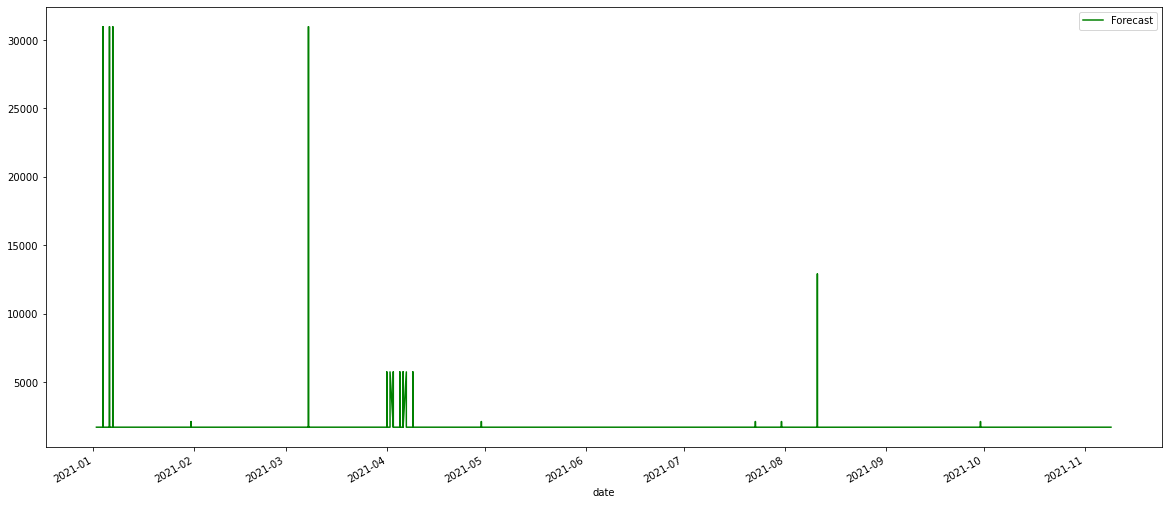

In [ ]:
Completion_Time = pd.DataFrame({"date":test["date_start"],
                        "ORGANIZATION":test["ORGANIZATION"],
                        "ENCOUNTERCLASS":test["ENCOUNTERCLASS"],
                        "Completion_Time":test_preds
                        })

Completion_Time.set_index("date").Completion_Time.plot(color = "green", figsize = (20,9),
                                       legend=True, label = "Forecast");

In [ ]:
Completion_Time

,date,ORGANIZATION,ENCOUNTERCLASS,Completion_Time
18422,2021-05-22,0.0,5.0,1690.018667
21531,2021-03-01,1.0,5.0,1690.702297
1081,2021-06-11,2.0,5.0,1690.018667
34667,2021-09-17,6.0,5.0,1690.018667
51781,2021-05-04,7.0,5.0,1690.702297
...,...,...,...,...
16080,2021-05-10,1089.0,3.0,1690.018667
16082,2021-05-30,1089.0,3.0,1690.018667
16083,2021-05-31,1089.0,3.0,1690.018667
42921,2021-10-13,1089.0,3.0,1690.018667


In [ ]:
Completion_Time.loc[Completion_Time.date>"2021-01-01"]

,date,ORGANIZATION,ENCOUNTERCLASS,Completion_Time
18422,2021-05-22,0.0,5.0,1690.018667
21531,2021-03-01,1.0,5.0,1690.702297
1081,2021-06-11,2.0,5.0,1690.018667
34667,2021-09-17,6.0,5.0,1690.018667
51781,2021-05-04,7.0,5.0,1690.702297
...,...,...,...,...
16080,2021-05-10,1089.0,3.0,1690.018667
16082,2021-05-30,1089.0,3.0,1690.018667
16083,2021-05-31,1089.0,3.0,1690.018667
42921,2021-10-13,1089.0,3.0,1690.018667


# Supplies Prediction

In [ ]:
categorical_columns = ["DESCRIPTION"]
for columns in categorical_columns:
  encode(supplies[columns])

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
supplies_needed = supplies_orginal.copy()

In [ ]:
supplies_needed

,DATE,PATIENT,ENCOUNTER,CODE,DESCRIPTION,QUANTITY
0,2021-01-26,5ed07e24-b554-06fd-b3ae-d8315b8e7502,11ea091e-77f5-c8ca-6102-1ed2bcc86997,409534002,Disposable air-purifying respirator (physical ...,2
1,2021-01-26,5ed07e24-b554-06fd-b3ae-d8315b8e7502,11ea091e-77f5-c8ca-6102-1ed2bcc86997,713779008,Nitrile examination/treatment glove non-powde...,24
2,2021-01-26,5ed07e24-b554-06fd-b3ae-d8315b8e7502,11ea091e-77f5-c8ca-6102-1ed2bcc86997,469673003,Isolation gown single-use (physical object),12
3,2021-01-26,5ed07e24-b554-06fd-b3ae-d8315b8e7502,11ea091e-77f5-c8ca-6102-1ed2bcc86997,706724001,Face shield (physical object),2
4,2021-01-26,5ed07e24-b554-06fd-b3ae-d8315b8e7502,11ea091e-77f5-c8ca-6102-1ed2bcc86997,419343004,Alcohol disinfectant (substance),1
...,...,...,...,...,...,...
1725,2021-01-21,ff388a16-9495-67c1-a782-4d46193dd935,884a1e3d-2a05-7bdb-3b7b-e8f07879dfe4,469673003,Isolation gown single-use (physical object),10
1726,2021-01-21,ff388a16-9495-67c1-a782-4d46193dd935,884a1e3d-2a05-7bdb-3b7b-e8f07879dfe4,409534002,Disposable air-purifying respirator (physical ...,2
1727,2021-01-21,ff388a16-9495-67c1-a782-4d46193dd935,884a1e3d-2a05-7bdb-3b7b-e8f07879dfe4,706724001,Face shield (physical object),2
1728,2021-01-21,ff388a16-9495-67c1-a782-4d46193dd935,884a1e3d-2a05-7bdb-3b7b-e8f07879dfe4,419343004,Alcohol disinfectant (substance),2


In [ ]:
supplies_needed.sort_values(by="DATE")

,DATE,PATIENT,ENCOUNTER,CODE,DESCRIPTION,QUANTITY
213,2020-07-14,528f6ac3-12a3-1431-19db-ac6be25929e3,1a7a2b40-f9c3-6320-fee6-3310bafbd855,470618009,Antiseptic towelette (physical object),8
212,2020-07-14,528f6ac3-12a3-1431-19db-ac6be25929e3,1a7a2b40-f9c3-6320-fee6-3310bafbd855,419343004,Alcohol disinfectant (substance),1
211,2020-07-14,528f6ac3-12a3-1431-19db-ac6be25929e3,1a7a2b40-f9c3-6320-fee6-3310bafbd855,706724001,Face shield (physical object),2
210,2020-07-14,528f6ac3-12a3-1431-19db-ac6be25929e3,1a7a2b40-f9c3-6320-fee6-3310bafbd855,469673003,Isolation gown single-use (physical object),12
209,2020-07-14,528f6ac3-12a3-1431-19db-ac6be25929e3,1a7a2b40-f9c3-6320-fee6-3310bafbd855,713779008,Nitrile examination/treatment glove non-powde...,24
...,...,...,...,...,...,...
1433,2021-08-05,1d01d52f-f841-327e-78e0-aacedd6caa06,d312c621-e592-fbbe-c2c4-81749673590e,409534002,Disposable air-purifying respirator (physical ...,2
1434,2021-08-05,1d01d52f-f841-327e-78e0-aacedd6caa06,d312c621-e592-fbbe-c2c4-81749673590e,713779008,Nitrile examination/treatment glove non-powde...,24
1435,2021-08-05,1d01d52f-f841-327e-78e0-aacedd6caa06,d312c621-e592-fbbe-c2c4-81749673590e,469673003,Isolation gown single-use (physical object),12
1436,2021-08-05,1d01d52f-f841-327e-78e0-aacedd6caa06,d312c621-e592-fbbe-c2c4-81749673590e,706724001,Face shield (physical object),2


In [ ]:
enc = encounters_orginal.copy()
enc = enc.rename(columns={"Id":"ENCOUNTER"})

In [ ]:
pd.merge(supplies_needed, enc, on="ENCOUNTER")

,DATE,PATIENT_x,ENCOUNTER,CODE_x,DESCRIPTION_x,QUANTITY,START,STOP,PATIENT_y,ORGANIZATION,PROVIDER,PAYER,ENCOUNTERCLASS,CODE_y,DESCRIPTION_y,BASE_ENCOUNTER_COST,TOTAL_CLAIM_COST,PAYER_COVERAGE,REASONCODE,REASONDESCRIPTION,Completion_Time
0,2021-01-26,5ed07e24-b554-06fd-b3ae-d8315b8e7502,11ea091e-77f5-c8ca-6102-1ed2bcc86997,409534002,Disposable air-purifying respirator (physical ...,2,2021-01-26 12:55:06+00:00,2021-01-31 15:40:53+00:00,5ed07e24-b554-06fd-b3ae-d8315b8e7502,03347b4d-994e-302b-848b-58019a4e274d,9a6f1d43-f7f1-3b99-9422-c65fb7ca51fa,b3221cfc-24fb-339e-823d-bc4136cbc4ed,inpatient,1505002,Hospital admission for isolation (procedure),129.16,18179.67,17175.69,840539006.0,COVID-19,5 days 02:45:47
1,2021-01-26,5ed07e24-b554-06fd-b3ae-d8315b8e7502,11ea091e-77f5-c8ca-6102-1ed2bcc86997,713779008,Nitrile examination/treatment glove non-powde...,24,2021-01-26 12:55:06+00:00,2021-01-31 15:40:53+00:00,5ed07e24-b554-06fd-b3ae-d8315b8e7502,03347b4d-994e-302b-848b-58019a4e274d,9a6f1d43-f7f1-3b99-9422-c65fb7ca51fa,b3221cfc-24fb-339e-823d-bc4136cbc4ed,inpatient,1505002,Hospital admission for isolation (procedure),129.16,18179.67,17175.69,840539006.0,COVID-19,5 days 02:45:47
2,2021-01-26,5ed07e24-b554-06fd-b3ae-d8315b8e7502,11ea091e-77f5-c8ca-6102-1ed2bcc86997,469673003,Isolation gown single-use (physical object),12,2021-01-26 12:55:06+00:00,2021-01-31 15:40:53+00:00,5ed07e24-b554-06fd-b3ae-d8315b8e7502,03347b4d-994e-302b-848b-58019a4e274d,9a6f1d43-f7f1-3b99-9422-c65fb7ca51fa,b3221cfc-24fb-339e-823d-bc4136cbc4ed,inpatient,1505002,Hospital admission for isolation (procedure),129.16,18179.67,17175.69,840539006.0,COVID-19,5 days 02:45:47
3,2021-01-26,5ed07e24-b554-06fd-b3ae-d8315b8e7502,11ea091e-77f5-c8ca-6102-1ed2bcc86997,706724001,Face shield (physical object),2,2021-01-26 12:55:06+00:00,2021-01-31 15:40:53+00:00,5ed07e24-b554-06fd-b3ae-d8315b8e7502,03347b4d-994e-302b-848b-58019a4e274d,9a6f1d43-f7f1-3b99-9422-c65fb7ca51fa,b3221cfc-24fb-339e-823d-bc4136cbc4ed,inpatient,1505002,Hospital admission for isolation (procedure),129.16,18179.67,17175.69,840539006.0,COVID-19,5 days 02:45:47
4,2021-01-26,5ed07e24-b554-06fd-b3ae-d8315b8e7502,11ea091e-77f5-c8ca-6102-1ed2bcc86997,419343004,Alcohol disinfectant (substance),1,2021-01-26 12:55:06+00:00,2021-01-31 15:40:53+00:00,5ed07e24-b554-06fd-b3ae-d8315b8e7502,03347b4d-994e-302b-848b-58019a4e274d,9a6f1d43-f7f1-3b99-9422-c65fb7ca51fa,b3221cfc-24fb-339e-823d-bc4136cbc4ed,inpatient,1505002,Hospital admission for isolation (procedure),129.16,18179.67,17175.69,840539006.0,COVID-19,5 days 02:45:47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1725,2021-01-21,ff388a16-9495-67c1-a782-4d46193dd935,884a1e3d-2a05-7bdb-3b7b-e8f07879dfe4,469673003,Isolation gown single-use (physical object),10,2021-01-12 12:44:23+00:00,2021-01-21 22:09:45+00:00,ff388a16-9495-67c1-a782-4d46193dd935,4861d01f-019c-3dac-a153-8334e50919f9,217cecad-fcf9-3a6c-bbbe-e1d4b4cdaf74,7caa7254-5050-3b5e-9eae-bd5ea30e809c,inpatient,305351004,Admission to intensive care unit (procedure),129.16,236657.02,189293.62,840539006.0,COVID-19,9 days 09:25:22
1726,2021-01-21,ff388a16-9495-67c1-a782-4d46193dd935,884a1e3d-2a05-7bdb-3b7b-e8f07879dfe4,409534002,Disposable air-purifying respirator (physical ...,2,2021-01-12 12:44:23+00:00,2021-01-21 22:09:45+00:00,ff388a16-9495-67c1-a782-4d46193dd935,4861d01f-019c-3dac-a153-8334e50919f9,217cecad-fcf9-3a6c-bbbe-e1d4b4cdaf74,7caa7254-5050-3b5e-9eae-bd5ea30e809c,inpatient,305351004,Admission to intensive care unit (procedure),129.16,236657.02,189293.62,840539006.0,COVID-19,9 days 09:25:22
1727,2021-01-21,ff388a16-9495-67c1-a782-4d46193dd935,884a1e3d-2a05-7bdb-3b7b-e8f07879dfe4,706724001,Face shield (physical object),2,2021-01-12 12:44:23+00:00,2021-01-21 22:09:45+00:00,ff388a16-9495-67c1-a782-4d46193dd935,4861d01f-019c-3dac-a153-8334e50919f9,217cecad-fcf9-3a6c-bbbe-e1d4b4cdaf74,7caa7254-5050-3b5e-9eae-bd5ea30e809c,inpatient,305351004,Admission to intensive care unit (pro

In [ ]:
supplies.iloc[:,-2:]

,DESCRIPTION,QUANTITY
0,4.0,2
1,13.0,24
2,9.0,12
3,7.0,2
4,0.0,1
...,...,...
1725,9.0,10
1726,4.0,2
1727,7.0,2
1728,0.0,2


In [ ]:
impute_data = supplies.iloc[:,-2:]
impute_data

,DESCRIPTION,QUANTITY
0,4.0,2
1,13.0,24
2,9.0,12
3,7.0,2
4,0.0,1
...,...,...
1725,9.0,10
1726,4.0,2
1727,7.0,2
1728,0.0,2


In [ ]:
impute_data.nunique()

DESCRIPTION    20
QUANTITY        9
dtype: int64

In [ ]:
impute_data.isnull().sum()

DESCRIPTION    0
QUANTITY       0
dtype: int64

In [ ]:
target = impute_data["QUANTITY"]
features = impute_data.drop('QUANTITY', axis=1)

In [ ]:
target.value_counts()

2     630
1     287
8     227
24    222
12    222
44     44
16     44
10     44
3      10
Name: QUANTITY, dtype: int64

In [ ]:
#dividing dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(features, target,test_size = 0.2)

#to resolve any class imbalance - use stratify parameter.
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (1384, 1)
Number transactions y_train dataset:  (1384,)
Number transactions X_test dataset:  (346, 1)
Number transactions y_test dataset:  (346,)


In [ ]:
X_train

,DESCRIPTION
1194,13.0
945,0.0
979,9.0
439,13.0
1041,0.0
...,...
611,7.0
809,4.0
1359,0.0
291,13.0


In [ ]:
#Normalizing numerical values
sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_train2.columns = X_train.columns.values
X_train2.index = X_train.index.values
X_train = X_train2
X_test2 = pd.DataFrame(sc_X.transform(X_test))
X_test2.columns = X_test.columns.values
X_test2.index = X_test.index.values
X_test = X_test2

In [ ]:
X_train2

,DESCRIPTION
1194,1.551250
945,-1.262835
979,0.685378
439,1.551250
1041,-1.262835
...,...
611,0.252442
809,-0.396962
1359,-1.262835
291,1.551250


In [ ]:
# create an xgboost regression model
model = XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X_train2, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )

Mean MAE: 1.459 (0.275)


In [ ]:
model = LinearRegression()
model.fit(X_train2, y_train)
# evaluate the model
yhat = model.predict(X_test2)
# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

MAE: 5.453


In [ ]:
yhat

array([ 0.97172206,  0.97172206,  9.63904392,  5.92447741,  5.92447741,
        5.92447741,  9.63904392,  2.2099109 ,  5.92447741, 10.87723276,
        0.97172206, 12.11542159,  2.2099109 , 17.06817694, 12.11542159,
       24.49730996, 12.11542159,  9.63904392,  5.92447741,  9.63904392,
       12.11542159, 12.11542159,  0.97172206,  0.97172206, 12.11542159,
        2.2099109 ,  2.2099109 ,  9.63904392, 12.11542159,  2.2099109 ,
        0.97172206,  0.97172206, 17.06817694,  9.63904392,  9.63904392,
        5.92447741,  5.92447741, 10.87723276,  2.2099109 ,  0.97172206,
       17.06817694,  5.92447741, 17.06817694,  2.2099109 ,  5.92447741,
       12.11542159,  9.63904392,  9.63904392, 19.54455462, 17.06817694,
        9.63904392,  5.92447741, 17.06817694,  0.97172206,  9.63904392,
        5.92447741, 12.11542159,  0.97172206,  5.92447741,  0.97172206,
        9.63904392, 17.06817694,  0.97172206,  5.92447741,  5.92447741,
       17.06817694,  8.40085508,  5.92447741,  0.97172206, 12.11

In [ ]:
y_test

1281     1
1077     1
812      2
1037     2
384      2
        ..
1482     1
564      2
1017     1
1514    16
1168     8
Name: QUANTITY, Length: 346, dtype: int64

# predict demand per department

In [ ]:
demand = encounters_orginal.copy()
demand.START = pd.to_datetime(demand.START)
demand.STOP = pd.to_datetime(demand.STOP)

In [ ]:
demand["date"] = demand.START.dt.date

In [ ]:
demand = demand.groupby(["ORGANIZATION", "date"]).ENCOUNTERCLASS.value_counts().reset_index(name="demand").sort_values(by="date")

In [ ]:
encoder = OrdinalEncoder()
imputer = KNN()
categorical_columns=['ORGANIZATION', "ENCOUNTERCLASS"]

#create a for loop to iterate through each column in the data

for columns in categorical_columns:
  encode(demand[columns])

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
demand.date = pd.to_datetime(demand.date)

In [ ]:
demand['month'] = demand.date.dt.month
demand['day'] = demand.date.dt.day
demand['year'] = demand.date.dt.year
demand['week_of_year'] = demand.date.dt.weekofyear
demand['day_of_year'] = demand.date.dt.dayofyear
demand['day_of_week'] = demand.date.dt.dayofweek
demand['is_weknd'] = demand.date.dt.weekday // 4
demand['is_month_start'] = demand.date.dt.is_month_start.astype(int)
demand['is_month_end'] = demand.date.dt.is_month_end.astype(int)
demand

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  after removing the cwd from sys.path.


,ORGANIZATION,date,ENCOUNTERCLASS,demand,month,day,year,week_of_year,day_of_year,day_of_week,is_weknd,is_month_start,is_month_end
27673,499.0,1911-09-16,5.0,1,9,16,1911,37,259,5,1,0,0
27674,499.0,1911-10-21,5.0,1,10,21,1911,42,294,5,1,0,0
27675,499.0,1911-12-23,5.0,1,12,23,1911,51,357,5,1,0,0
27676,499.0,1912-02-24,5.0,1,2,24,1912,8,55,5,1,0,0
27677,499.0,1912-05-25,5.0,1,5,25,1912,21,146,5,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31539,602.0,2021-11-08,5.0,1,11,8,2021,45,312,0,0,0,0
1752,51.0,2021-11-09,5.0,1,11,9,2021,45,313,1,0,0,0
1317,42.0,2021-11-09,5.0,1,11,9,2021,45,313,1,0,0,0
55658,1041.0,2021-11-09,0.0,1,11,9,2021,45,313,1,0,0,0


In [ ]:
demand.demand.value_counts()

1    56244
2     1457
3      136
4       17
5        3
6        1
Name: demand, dtype: int64

In [ ]:
demand.reset_index(inplace=True)
demand = demand.drop(["index"],axis=1)

In [ ]:
demand

,ORGANIZATION,date,ENCOUNTERCLASS,demand,month,day,year,week_of_year,day_of_year,day_of_week,is_weknd,is_month_start,is_month_end
0,499.0,1911-09-16,5.0,1,9,16,1911,37,259,5,1,0,0
1,499.0,1911-10-21,5.0,1,10,21,1911,42,294,5,1,0,0
2,499.0,1911-12-23,5.0,1,12,23,1911,51,357,5,1,0,0
3,499.0,1912-02-24,5.0,1,2,24,1912,8,55,5,1,0,0
4,499.0,1912-05-25,5.0,1,5,25,1912,21,146,5,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
57853,602.0,2021-11-08,5.0,1,11,8,2021,45,312,0,0,0,0
57854,51.0,2021-11-09,5.0,1,11,9,2021,45,313,1,0,0,0
57855,42.0,2021-11-09,5.0,1,11,9,2021,45,313,1,0,0,0
57856,1041.0,2021-11-09,0.0,1,11,9,2021,45,313,1,0,0,0


In [ ]:
demand.groupby(["ORGANIZATION", "ENCOUNTERCLASS", "month"]).agg({"demand": ["sum", "mean", "median", "std"]})

demand                 
                                     sum mean median  std
ORGANIZATION ENCOUNTERCLASS month                        
0.0          5.0            4          4  1.0    1.0  0.0
                            5          6  1.0    1.0  0.0
1.0          5.0            1          5  1.0    1.0  0.0
                            2          5  1.0    1.0  0.0
                            3          1  1.0    1.0  NaN
...                                  ...  ...    ...  ...
1089.0       3.0            6          5  1.0    1.0  0.0
                            8          2  1.0    1.0  0.0
                            10         2  1.0    1.0  0.0
                            11         2  1.0    1.0  0.0
                            12         1  1.0    1.0  NaN

[8184 rows x 4 columns]

In [ ]:
demand.groupby(["ENCOUNTERCLASS", "month"]).agg({"demand": ["sum", "mean", "median", "std"]})

demand                           
                        sum      mean median       std
ENCOUNTERCLASS month                                  
0.0            1       1852  1.041034      1  0.206754
               2       2490  1.186279      1  0.503640
               3       1873  1.078296      1  0.312335
               4       1712  1.041363      1  0.208153
               5       1744  1.042439      1  0.201648
...                     ...       ...    ...       ...
5.0            8       1955  1.010336      1  0.128215
               9       1901  1.008488      1  0.112547
               10      1995  1.009105      1  0.109831
               11      1931  1.012585      1  0.124825
               12      1876  1.010776      1  0.103274

[72 rows x 4 columns]

In [ ]:
demand.sort_values(by=['ORGANIZATION', 'ENCOUNTERCLASS', 'date'], axis=0, inplace=True)
demand.head()

,ORGANIZATION,date,ENCOUNTERCLASS,demand,month,day,year,week_of_year,day_of_year,day_of_week,is_weknd,is_month_start,is_month_end
23960,0.0,2007-05-19,5.0,1,5,19,2007,20,139,5,1,0,0
24667,0.0,2008-05-24,5.0,1,5,24,2008,21,145,5,1,0,0
35068,0.0,2014-04-12,5.0,1,4,12,2014,15,102,5,1,0,0
37943,0.0,2015-04-18,5.0,1,4,18,2015,16,108,5,1,0,0
40852,0.0,2016-04-23,5.0,1,4,23,2016,16,114,5,1,0,0


In [ ]:
# def random_noise(dataframe):
#     return np.random.normal(scale=1.6, size=(len(dataframe),))

In [ ]:
# def lag_features(dataframe, lags):
#     for lag in lags:
#         dataframe['demand_lag_' + str(lag)] = dataframe.groupby(["ORGANIZATION", "ENCOUNTERCLASS"])['demand'].transform(
#             lambda x: x.shift(lag)) + random_noise(dataframe)
#     return dataframe

# demand = lag_features(demand, [91, 98, 105, 112, 119, 126, 182, 364, 546, 728])

In [ ]:
# def roll_mean_features(dataframe, windows):
#     for window in windows:
#         dataframe['demand_roll_mean_' + str(window)] = dataframe.groupby(["ORGANIZATION", "ENCOUNTERCLASS"])['demand']. \
#                                                           transform(
#             lambda x: x.shift(1).rolling(window=window, min_periods=10, win_type="triang").mean()) + random_noise(
#             dataframe)
#     return dataframe


# demand = roll_mean_features(demand, [365, 546, 730])

In [ ]:
# def ewm_features(dataframe, alphas, lags):
#     for alpha in alphas:
#         for lag in lags:
#             dataframe['demand_ewm_alpha_' + str(alpha).replace(".", "") + "_lag_" + str(lag)] = \
#                 dataframe.groupby(["ORGANIZATION", "ENCOUNTERCLASS"])['demand'].transform(lambda x: x.shift(lag).ewm(alpha=alpha).mean())
#     return dataframe


# alphas = [0.99, 0.95, 0.9, 0.8, 0.7, 0.5]
# lags = [91, 98, 105, 112, 180, 270, 365, 546, 728]

# demand = ewm_features(demand, alphas, lags)
# demand.tail()

In [ ]:
demand.head()

,ORGANIZATION,date,ENCOUNTERCLASS,demand,month,day,year,week_of_year,day_of_year,day_of_week,is_weknd,is_month_start,is_month_end
23960,0.0,2007-05-19,5.0,1,5,19,2007,20,139,5,1,0,0
24667,0.0,2008-05-24,5.0,1,5,24,2008,21,145,5,1,0,0
35068,0.0,2014-04-12,5.0,1,4,12,2014,15,102,5,1,0,0
37943,0.0,2015-04-18,5.0,1,4,18,2015,16,108,5,1,0,0
40852,0.0,2016-04-23,5.0,1,4,23,2016,16,114,5,1,0,0


In [ ]:
#One-Hot Encoding

demand = pd.get_dummies(demand, columns=['day_of_week', 'month'])

In [ ]:
train = demand.loc[(demand["date"] < "2010-01-01"), :]

val = demand.loc[(demand["date"] >= "2010-01-01") & (demand["date"] < "2015-01-01"), :]

cols = [col for col in train.columns if col not in ['demand','date']]

In [ ]:
demand

,ORGANIZATION,date,ENCOUNTERCLASS,demand,day,year,week_of_year,day_of_year,is_weknd,is_month_start,is_month_end,day_of_week_0,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
23960,0.0,2007-05-19,5.0,1,19,2007,20,139,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
24667,0.0,2008-05-24,5.0,1,24,2008,21,145,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
35068,0.0,2014-04-12,5.0,1,12,2014,15,102,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
37943,0.0,2015-04-18,5.0,1,18,2015,16,108,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
40852,0.0,2016-04-23,5.0,1,23,2016,16,114,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55857,1089.0,2021-05-10,3.0,1,10,2021,19,130,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
56135,1089.0,2021-05-30,3.0,1,30,2021,21,150,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
56143,1089.0,2021-05-31,3.0,1,31,2021,22,151,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
57594,1089.0,2021-10-13,3.0,1,13,2021,41,286,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
demand.loc[demand["date"] > "2015-01-01", "demand"] = np.nan

In [ ]:
demand.tail()

,ORGANIZATION,date,ENCOUNTERCLASS,demand,day,year,week_of_year,day_of_year,is_weknd,is_month_start,is_month_end,day_of_week_0,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
55857,1089.0,2021-05-10,3.0,NaN,10,2021,19,130,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
56135,1089.0,2021-05-30,3.0,NaN,30,2021,21,150,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
56143,1089.0,2021-05-31,3.0,NaN,31,2021,22,151,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
57594,1089.0,2021-10-13,3.0,NaN,13,2021,41,286,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
57782,1089.0,2021-11-03,3.0,NaN,3,2021,44,307,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
Y_train = train['demand']

X_train = train[cols]

Y_val = val['demand']

X_val = val[cols]

Y_train.shape, X_train.shape, Y_val.shape, X_val.shape

((25833,), (25833, 28), (11248,), (11248, 28))

In [ ]:
def smape(preds, target):
    n = len(preds)
    masked_arr = ~((preds == 0) & (target == 0))
    preds, target = preds[masked_arr], target[masked_arr]
    num = np.abs(preds - target)
    denom = np.abs(preds) + np.abs(target)
    smape_val = (200 * np.sum(num / denom)) / n
    return smape_val


def lgbm_smape(preds, train_data):
    labels = train_data.get_label()
    smape_val = smape(np.expm1(preds), np.expm1(labels))
    return 'SMAPE', smape_val, False

In [ ]:
# LightGBM parameters
lgb_params = {'metric': {'mae'},
              'num_leaves': 10,
              'learning_rate': 0.02,
              'feature_fraction': 0.8,
              'max_depth': 5,
              'verbose': 0,
              'num_boost_round': 10000,
              'early_stopping_rounds': 200,
              'nthread': -1}

In [ ]:
import lightgbm as lgb

In [ ]:
lgbtrain = lgb.Dataset(data=X_train, label=Y_train, feature_name=cols)
lgbval = lgb.Dataset(data=X_val, label=Y_val, reference=lgbtrain, feature_name=cols)

model = lgb.train(lgb_params, lgbtrain,
                  valid_sets=[lgbtrain, lgbval],
                  num_boost_round=lgb_params['num_boost_round'],
                  early_stopping_rounds=lgb_params['early_stopping_rounds'],
                  # feval=lgbm_smape
                  verbose_eval=100)

y_pred_val = model.predict(X_val, num_iteration=model.best_iteration)

smape(np.expm1(y_pred_val), np.expm1(Y_val))

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:123: UserWarning: Found `early_stopping_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 200 rounds.
[100]	training's l1: 0.0353397	valid_1's l1: 0.0721531
[200]	training's l1: 0.0342555	valid_1's l1: 0.0706075
[300]	training's l1: 0.0336913	valid_1's l1: 0.0700632
[400]	training's l1: 0.0335866	valid_1's l1: 0.0697372
[500]	training's l1: 0.0334859	valid_1's l1: 0.0695261
[600]	training's l1: 0.0334443	valid_1's l1: 0.0694768
[700]	training's l1: 0.0334413	valid_1's l1: 0.0694891
[800]	training's l1: 0.0334358	valid_1's l1: 0.0696513
Early stopping, best iteration is:
[642]	training's l1: 0.0334249	valid_1's l1: 0.069431


7.58224336610625

In [ ]:
train = demand.loc[~demand.demand.isna()]
Y_train = train['demand']
X_train = train[cols]

test = demand.loc[demand.demand.isna()]
X_test = test[cols]

In [ ]:
test

,ORGANIZATION,date,ENCOUNTERCLASS,demand,day,year,week_of_year,day_of_year,is_weknd,is_month_start,is_month_end,day_of_week_0,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
37943,0.0,2015-04-18,5.0,NaN,18,2015,16,108,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
40852,0.0,2016-04-23,5.0,NaN,23,2016,16,114,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
43630,0.0,2017-04-29,5.0,NaN,29,2017,17,119,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
46572,0.0,2018-05-05,5.0,NaN,5,2018,18,125,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
49421,0.0,2019-05-11,5.0,NaN,11,2019,19,131,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55857,1089.0,2021-05-10,3.0,NaN,10,2021,19,130,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
56135,1089.0,2021-05-30,3.0,NaN,30,2021,21,150,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
56143,1089.0,2021-05-31,3.0,NaN,31,2021,22,151,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
57594,1089.0,2021-10-13,3.0,NaN,13,2021,41,286,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
lgb_params = {'metric': {'mae'},
              'num_leaves': 10,
              'learning_rate': 0.02,
              'feature_fraction': 0.8,
              'max_depth': 5,
              'verbose': 0,
              'nthread': -1,
              "num_boost_round": model.best_iteration}

# LightGBM dataset
lgbtrain_all = lgb.Dataset(data=X_train, label=Y_train, feature_name=cols)

model = lgb.train(lgb_params, lgbtrain_all, num_boost_round=model.best_iteration)
test_preds = model.predict(X_test, num_iteration=model.best_iteration)

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


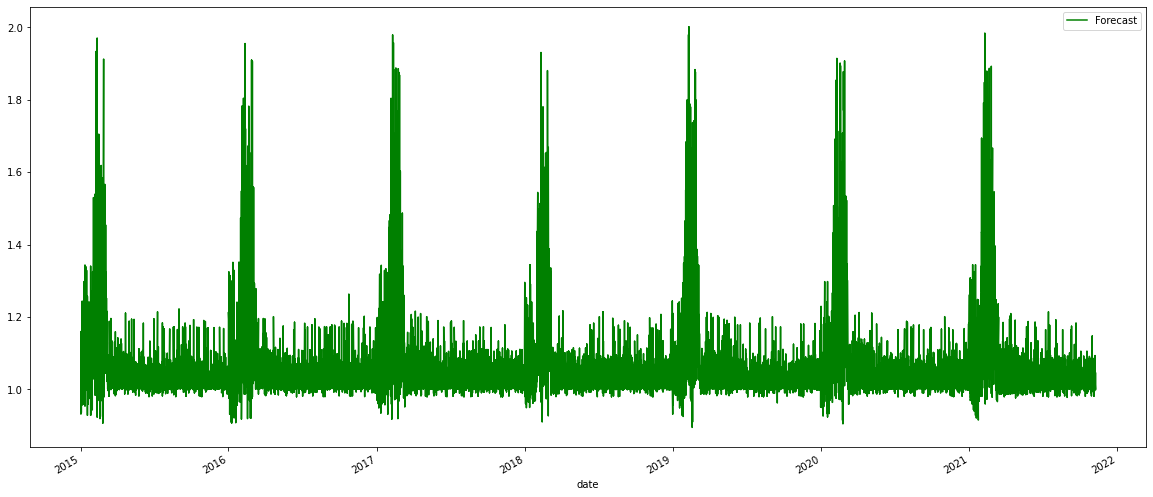

In [ ]:
forecast = pd.DataFrame({"date":test["date"],
                        "ORGANIZATION":test["ORGANIZATION"],
                        "ENCOUNTERCLASS":test["ENCOUNTERCLASS"],
                        "demand":test_preds
                        })

forecast.set_index("date").demand.plot(color = "green", figsize = (20,9),
                                       legend=True, label = "Forecast");

In [ ]:
demand.groupby(["date", "ENCOUNTERCLASS"]).demand.sum()

date        ENCOUNTERCLASS
1911-09-16  5.0               1.0
1911-10-21  5.0               1.0
1911-12-23  5.0               1.0
1912-02-24  5.0               1.0
1912-05-25  5.0               1.0
                             ... 
2021-11-08  4.0               0.0
            5.0               0.0
2021-11-09  0.0               0.0
            4.0               0.0
            5.0               0.0
Name: demand, Length: 32536, dtype: float64

In [ ]:
forecast.loc[forecast.date >= "2021-01-01"].sort_values("date")

,date,ORGANIZATION,ENCOUNTERCLASS,demand
54033,2021-01-01,714.0,0.0,1.090047
54028,2021-01-01,336.0,0.0,1.092650
54029,2021-01-01,336.0,3.0,1.030927
54032,2021-01-01,1025.0,1.0,1.066665
54026,2021-01-01,309.0,0.0,1.104400
...,...,...,...,...
57849,2021-11-08,155.0,3.0,1.016314
57854,2021-11-09,51.0,5.0,0.999457
57855,2021-11-09,42.0,5.0,0.999457
57857,2021-11-09,609.0,4.0,1.000422


In [ ]:
forecast.groupby(["ENCOUNTERCLASS", "date"]).agg({"demand": ["sum", "mean", "median", "std"]})

demand                              
                                sum      mean    median       std
ENCOUNTERCLASS date                                              
0.0            2015-01-02  6.560018  1.093336  1.085654  0.037183
               2015-01-03  1.121702  1.121702  1.121702       NaN
               2015-01-04  3.194883  1.064961  1.062283  0.023128
               2015-01-05  5.365434  1.073087  1.055009  0.101562
               2015-01-06  1.097962  1.097962  1.097962       NaN
...                             ...       ...       ...       ...
5.0            2021-11-05  2.012057  1.006029  1.006029  0.003892
               2021-11-06  1.007197  1.007197  1.007197       NaN
               2021-11-07  2.011368  1.005684  1.005684  0.004722
               2021-11-08  2.013548  1.006774  1.006774  0.001923
               2021-11-09  1.998913  0.999457  0.999457  0.000000

[8518 rows x 4 columns]

In [ ]:
forecast.groupby(["date", "ENCOUNTERCLASS"]).agg({"demand": ["sum", "mean", "median", "std"]}).tail()

demand                              
                                sum      mean    median       std
date       ENCOUNTERCLASS                                        
2021-11-08 4.0             1.020920  1.020920  1.020920       NaN
           5.0             2.013548  1.006774  1.006774  0.001923
2021-11-09 0.0             1.046199  1.046199  1.046199       NaN
           4.0             1.000422  1.000422  1.000422       NaN
           5.0             1.998913  0.999457  0.999457  0.000000

DEMAND PER SPECIALITY

In [ ]:
providers_orginal = providers_orginal.rename(columns={"Id":"PROVIDER"})

In [ ]:
providers_orginal.SPECIALITY.value_counts()

GENERAL PRACTICE            1094
INTERNAL MEDICINE            782
NURSE PRACTITIONER           529
CLINICAL SOCIAL WORKER       359
PHYSICAL THERAPY             342
                            ... 
NUCLEAR MEDICINE               1
ADDICTION MEDICINE             1
GYNECOLOGICAL ONCOLOGY         1
NEUROSURGERY                   1
INTERVENTIONAL RADIOLOGY       1
Name: SPECIALITY, Length: 65, dtype: int64

In [ ]:
providers_orginal.loc[providers_orginal.SPECIALITY == "PHYSICAL THERAPY"].PROVIDER

84      ad64b449-c27f-3030-b5f5-990406d19f14
85      8d70c945-d472-3960-ba0e-eeeb6d360ece
86      748e0343-6317-3063-9e34-de2065c088c9
87      62ab9191-c731-3be4-8830-1791ed6d7f35
88      e0965a2a-3a35-339e-a335-14b5355b4d3c
                        ...                 
5696    289cea79-b2b6-347b-b519-43f9484aab51
5697    cfc6ff33-7501-3498-a18c-eb6600aaa33e
5698    41e85b4b-d384-3a9d-b586-73f948a019e7
5699    d3641aab-0f89-308d-9e61-07e52a8e5ffd
5810    1554a3ff-55c9-3488-8c88-4e8d1fb87cd0
Name: PROVIDER, Length: 342, dtype: object

In [ ]:
for i in providers_orginal.loc[providers_orginal.SPECIALITY == "PHYSICAL THERAPY"].PROVIDER:
  print(encounters_orginal.loc[encounters_orginal.PROVIDER == i])

Empty DataFrame
Columns: [Id, START, STOP, PATIENT, ORGANIZATION, PROVIDER, PAYER, ENCOUNTERCLASS, CODE, DESCRIPTION, BASE_ENCOUNTER_COST, TOTAL_CLAIM_COST, PAYER_COVERAGE, REASONCODE, REASONDESCRIPTION, Completion_Time]
Index: []
Empty DataFrame
Columns: [Id, START, STOP, PATIENT, ORGANIZATION, PROVIDER, PAYER, ENCOUNTERCLASS, CODE, DESCRIPTION, BASE_ENCOUNTER_COST, TOTAL_CLAIM_COST, PAYER_COVERAGE, REASONCODE, REASONDESCRIPTION, Completion_Time]
Index: []
Empty DataFrame
Columns: [Id, START, STOP, PATIENT, ORGANIZATION, PROVIDER, PAYER, ENCOUNTERCLASS, CODE, DESCRIPTION, BASE_ENCOUNTER_COST, TOTAL_CLAIM_COST, PAYER_COVERAGE, REASONCODE, REASONDESCRIPTION, Completion_Time]
Index: []
Empty DataFrame
Columns: [Id, START, STOP, PATIENT, ORGANIZATION, PROVIDER, PAYER, ENCOUNTERCLASS, CODE, DESCRIPTION, BASE_ENCOUNTER_COST, TOTAL_CLAIM_COST, PAYER_COVERAGE, REASONCODE, REASONDESCRIPTION, Completion_Time]
Index: []
Empty DataFrame
Columns: [Id, START, STOP, PATIENT, ORGANIZATION, PROVIDER, 

In [ ]:
dem = pd.merge(encounters_orginal, providers_orginal, on="PROVIDER")

In [ ]:
dem.START = pd.to_datetime(dem.START)
dem.STOP = pd.to_datetime(dem.STOP)

In [ ]:
dem["date"] = dem.START.dt.date

In [ ]:
dem.SPECIALITY.value_counts()

GENERAL PRACTICE    59655
Name: SPECIALITY, dtype: int64

In [ ]:
dem.columns

Index(['Id', 'START', 'STOP', 'PATIENT', 'ORGANIZATION_x', 'PROVIDER', 'PAYER',
       'ENCOUNTERCLASS', 'CODE', 'DESCRIPTION', 'BASE_ENCOUNTER_COST',
       'TOTAL_CLAIM_COST', 'PAYER_COVERAGE', 'REASONCODE', 'REASONDESCRIPTION',
       'Completion_Time', 'ORGANIZATION_y', 'NAME', 'GENDER', 'SPECIALITY',
       'ADDRESS', 'CITY', 'STATE', 'ZIP', 'LAT', 'LON', 'UTILIZATION', 'date'],
      dtype='object')

In [ ]:
dem = dem.drop(["Id","ORGANIZATION_y",'BASE_ENCOUNTER_COST','CODE', "PATIENT", "PROVIDER", "PAYER",
       'TOTAL_CLAIM_COST', 'PAYER_COVERAGE', 'REASONCODE', 'REASONDESCRIPTION',
        'UTILIZATION', 'ADDRESS', 'CITY', 'STATE', 'ZIP', 'LAT', 'LON',], axis=1)

In [ ]:
dem = dem.groupby(["ORGANIZATION_x", "ENCOUNTERCLASS","date" ]).SPECIALITY.value_counts().reset_index(name="demand").sort_values(by="date")

In [ ]:
np.random.seed(444)
random_specialities = np.random.choice(
    a=providers_orginal.SPECIALITY.value_counts().index.tolist(),
    size = len(dem),
)
random_specialities

array(['CLINICAL SOCIAL WORKER', 'PODIATRY', 'CLINICAL PSYCHOLOGIST', ...,
       'CARDIOVASCULAR DISEASE (CARDIOLOGY)',
       'REGISTERED DIETITIAN OR NUTRITION PROFESSIONAL',
       'PHYSICAL MEDICINE AND REHABILITATION'], dtype='<U46')

In [ ]:
dem

,ORGANIZATION_x,ENCOUNTERCLASS,date,SPECIALITY,demand
27673,76a80350-916e-3fc9-8fed-2c8c4b36c42f,wellness,1911-09-16,GENERAL PRACTICE,1
27674,76a80350-916e-3fc9-8fed-2c8c4b36c42f,wellness,1911-10-21,GENERAL PRACTICE,1
27675,76a80350-916e-3fc9-8fed-2c8c4b36c42f,wellness,1911-12-23,GENERAL PRACTICE,1
27676,76a80350-916e-3fc9-8fed-2c8c4b36c42f,wellness,1912-02-24,GENERAL PRACTICE,1
27677,76a80350-916e-3fc9-8fed-2c8c4b36c42f,wellness,1912-05-25,GENERAL PRACTICE,1
...,...,...,...,...,...
53283,ef6ab57c-ed94-3dbe-9861-812d515918b3,ambulatory,2021-11-08,GENERAL PRACTICE,1
31727,90cf148c-69ed-3d33-aa86-b509c6b0b25f,urgentcare,2021-11-09,GENERAL PRACTICE,1
55515,f4e7709c-02f6-37ca-aeea-8247d74e88e7,ambulatory,2021-11-09,GENERAL PRACTICE,1
1317,08a94aac-7e11-3a09-a3e4-c2869ee66eee,wellness,2021-11-09,GENERAL PRACTICE,1


In [ ]:
dem.SPECIALITY = random_specialities

In [ ]:
encoder = OrdinalEncoder()
imputer = KNN()
categorical_columns=['ORGANIZATION_x', "SPECIALITY", "ENCOUNTERCLASS"]

#create a for loop to iterate through each column in the data

for columns in categorical_columns:
  encode(dem[columns])

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setit

In [ ]:
dem.date = pd.to_datetime(dem.date)

In [ ]:
dem['month'] = dem.date.dt.month
dem['day'] = dem.date.dt.day
dem['year'] = dem.date.dt.year
dem['week_of_year'] = dem.date.dt.weekofyear
dem['day_of_year'] = dem.date.dt.dayofyear
dem['day_of_week'] = dem.date.dt.dayofweek
dem['is_weknd'] = dem.date.dt.weekday // 4
dem['is_month_start'] = dem.date.dt.is_month_start.astype(int)
dem['is_month_end'] = dem.date.dt.is_month_end.astype(int)
dem

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  after removing the cwd from sys.path.


,ORGANIZATION_x,ENCOUNTERCLASS,date,SPECIALITY,demand,month,day,year,week_of_year,day_of_year,day_of_week,is_weknd,is_month_start,is_month_end
27673,499.0,5.0,1911-09-16,12.0,1,9,16,1911,37,259,5,1,0,0
27674,499.0,5.0,1911-10-21,54.0,1,10,21,1911,42,294,5,1,0,0
27675,499.0,5.0,1911-12-23,11.0,1,12,23,1911,51,357,5,1,0,0
27676,499.0,5.0,1912-02-24,25.0,1,2,24,1912,8,55,5,1,0,0
27677,499.0,5.0,1912-05-25,56.0,1,5,25,1912,21,146,5,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53283,1011.0,0.0,2021-11-08,55.0,1,11,8,2021,45,312,0,0,0,0
31727,609.0,4.0,2021-11-09,33.0,1,11,9,2021,45,313,1,0,0,0
55515,1041.0,0.0,2021-11-09,6.0,1,11,9,2021,45,313,1,0,0,0
1317,42.0,5.0,2021-11-09,59.0,1,11,9,2021,45,313,1,0,0,0


In [ ]:
dem.columns

Index(['ORGANIZATION_x', 'ENCOUNTERCLASS', 'date', 'SPECIALITY', 'demand',
       'month', 'day', 'year', 'week_of_year', 'day_of_year', 'day_of_week',
       'is_weknd', 'is_month_start', 'is_month_end'],
      dtype='object')

In [ ]:
dem.demand.value_counts()

1    56244
2     1457
3      136
4       17
5        3
6        1
Name: demand, dtype: int64

In [ ]:
dem = dem.sort_values(by="date")

In [ ]:
dem.reset_index(inplace=True)
dem = dem.drop(["index"],axis=1)

In [ ]:
dem.SPECIALITY.value_counts()

35.0    958
14.0    951
30.0    948
53.0    948
5.0     937
       ... 
27.0    856
62.0    851
21.0    850
19.0    839
26.0    823
Name: SPECIALITY, Length: 65, dtype: int64

In [ ]:
dem.groupby(["ORGANIZATION_x", "SPECIALITY", "month"]).agg({"demand": ["sum", "mean", "median", "std"]})

demand                
                                   sum mean median std
ORGANIZATION_x SPECIALITY month                       
0.0            0.0        5          1  1.0    1.0 NaN
               4.0        5          1  1.0    1.0 NaN
               9.0        5          1  1.0    1.0 NaN
               29.0       4          1  1.0    1.0 NaN
               30.0       5          1  1.0    1.0 NaN
...                                ...  ...    ...  ..
1089.0         62.0       10         1  1.0    1.0 NaN
               63.0       2          1  1.0    1.0 NaN
                          7          1  1.0    1.0 NaN
                          10         1  1.0    1.0 NaN
               64.0       2          1  1.0    1.0 NaN

[44712 rows x 4 columns]

In [ ]:
dem.groupby(["SPECIALITY", "month"]).agg({"demand": ["sum", "mean", "median", "std"]})

demand                           
                    sum      mean median       std
SPECIALITY month                                  
0.0        1         78  1.000000      1  0.000000
           2        121  1.080357      1  0.332568
           3         82  1.037975      1  0.192356
           4         71  1.014286      1  0.119523
           5         65  1.015625      1  0.125000
...                 ...       ...    ...       ...
64.0       8         90  1.046512      1  0.261533
           9         69  1.000000      1  0.000000
           10        68  1.030303      1  0.172733
           11        64  1.015873      1  0.125988
           12        75  1.013514      1  0.116248

[780 rows x 4 columns]

In [ ]:
dem.sort_values(by=['ORGANIZATION_x', "ENCOUNTERCLASS",'SPECIALITY', 'date'], axis=0, inplace=True)
dem.head()

,ORGANIZATION_x,ENCOUNTERCLASS,date,SPECIALITY,demand,month,day,year,week_of_year,day_of_year,day_of_week,is_weknd,is_month_start,is_month_end
56039,0.0,5.0,2021-05-22,0.0,1,5,22,2021,20,142,5,1,0,0
46566,0.0,5.0,2018-05-05,4.0,1,5,5,2018,18,125,5,1,0,0
23959,0.0,5.0,2007-05-19,9.0,1,5,19,2007,20,139,5,1,0,0
35077,0.0,5.0,2014-04-12,29.0,1,4,12,2014,15,102,5,1,0,0
24667,0.0,5.0,2008-05-24,30.0,1,5,24,2008,21,145,5,1,0,0


In [ ]:
# def random_noise(dataframe):
#     return np.random.normal(scale=1.6, size=(len(dataframe),))

In [ ]:
# def lag_features(dataframe, lags):
#     for lag in lags:
#         dataframe['demand_lag_' + str(lag)] = dataframe.groupby(["ORGANIZATION", "ENCOUNTERCLASS"])['demand'].transform(
#             lambda x: x.shift(lag)) + random_noise(dataframe)
#     return dataframe

# demand = lag_features(demand, [91, 98, 105, 112, 119, 126, 182, 364, 546, 728])

In [ ]:
# def roll_mean_features(dataframe, windows):
#     for window in windows:
#         dataframe['demand_roll_mean_' + str(window)] = dataframe.groupby(["ORGANIZATION", "ENCOUNTERCLASS"])['demand']. \
#                                                           transform(
#             lambda x: x.shift(1).rolling(window=window, min_periods=10, win_type="triang").mean()) + random_noise(
#             dataframe)
#     return dataframe


# demand = roll_mean_features(demand, [365, 546, 730])

In [ ]:
# def ewm_features(dataframe, alphas, lags):
#     for alpha in alphas:
#         for lag in lags:
#             dataframe['demand_ewm_alpha_' + str(alpha).replace(".", "") + "_lag_" + str(lag)] = \
#                 dataframe.groupby(["ORGANIZATION", "ENCOUNTERCLASS"])['demand'].transform(lambda x: x.shift(lag).ewm(alpha=alpha).mean())
#     return dataframe


# alphas = [0.99, 0.95, 0.9, 0.8, 0.7, 0.5]
# lags = [91, 98, 105, 112, 180, 270, 365, 546, 728]

# demand = ewm_features(demand, alphas, lags)
# demand.tail()

In [ ]:
dem.head()

,ORGANIZATION_x,ENCOUNTERCLASS,date,SPECIALITY,demand,month,day,year,week_of_year,day_of_year,day_of_week,is_weknd,is_month_start,is_month_end
56039,0.0,5.0,2021-05-22,0.0,1,5,22,2021,20,142,5,1,0,0
46566,0.0,5.0,2018-05-05,4.0,1,5,5,2018,18,125,5,1,0,0
23959,0.0,5.0,2007-05-19,9.0,1,5,19,2007,20,139,5,1,0,0
35077,0.0,5.0,2014-04-12,29.0,1,4,12,2014,15,102,5,1,0,0
24667,0.0,5.0,2008-05-24,30.0,1,5,24,2008,21,145,5,1,0,0


In [ ]:
#One-Hot Encoding

dem = pd.get_dummies(dem, columns=['day_of_week', 'day'])

In [ ]:
train = dem.loc[(dem["date"] < "2010-01-01"), :]

val = dem.loc[(dem["date"] >= "2010-01-01") & (dem["date"] < "2015-01-01"), :]

cols = [col for col in train.columns if col not in ['demand', "date"]]

In [ ]:
dem

,ORGANIZATION_x,ENCOUNTERCLASS,date,SPECIALITY,demand,month,year,week_of_year,day_of_year,is_weknd,is_month_start,is_month_end,day_of_week_0,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6,day_1,day_2,day_3,day_4,day_5,day_6,day_7,day_8,day_9,day_10,day_11,day_12,day_13,day_14,day_15,day_16,day_17,day_18,day_19,day_20,day_21,day_22,day_23,day_24,day_25,day_26,day_27,day_28,day_29,day_30,day_31
56039,0.0,5.0,2021-05-22,0.0,1,5,2021,20,142,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
46566,0.0,5.0,2018-05-05,4.0,1,5,2018,18,125,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23959,0.0,5.0,2007-05-19,9.0,1,5,2007,20,139,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
35077,0.0,5.0,2014-04-12,29.0,1,4,2014,15,102,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
24667,0.0,5.0,2008-05-24,30.0,1,5,2008,21,145,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34934,1089.0,3.0,2014-03-30,55.0,1,3,2014,13,89,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
55234,1089.0,3.0,2021-04-04,55.0,1,4,2021,13,94,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
25365,1089.0,3.0,2009-04-29,58.0,1,4,2009,18,119,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
56126,1089.0,3.0,2021-05-30,62.0,1,5,2021,21,150,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
dem.loc[dem["date"] > "2015-01-01", "demand"] = np.nan

In [ ]:
dem.tail()

,ORGANIZATION_x,ENCOUNTERCLASS,date,SPECIALITY,demand,month,year,week_of_year,day_of_year,is_weknd,is_month_start,is_month_end,day_of_week_0,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6,day_1,day_2,day_3,day_4,day_5,day_6,day_7,day_8,day_9,day_10,day_11,day_12,day_13,day_14,day_15,day_16,day_17,day_18,day_19,day_20,day_21,day_22,day_23,day_24,day_25,day_26,day_27,day_28,day_29,day_30,day_31
34934,1089.0,3.0,2014-03-30,55.0,1.0,3,2014,13,89,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
55234,1089.0,3.0,2021-04-04,55.0,NaN,4,2021,13,94,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
25365,1089.0,3.0,2009-04-29,58.0,1.0,4,2009,18,119,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
56126,1089.0,3.0,2021-05-30,62.0,NaN,5,2021,21,150,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
57593,1089.0,3.0,2021-10-13,62.0,NaN,10,2021,41,286,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
Y_train = train['demand']

X_train = train[cols]

Y_val = val['demand']

X_val = val[cols]

Y_train.shape, X_train.shape, Y_val.shape, X_val.shape

((25833,), (25833, 48), (11248,), (11248, 48))

In [ ]:
def smape(preds, target):
    n = len(preds)
    masked_arr = ~((preds == 0) & (target == 0))
    preds, target = preds[masked_arr], target[masked_arr]
    num = np.abs(preds - target)
    denom = np.abs(preds) + np.abs(target)
    smape_val = (200 * np.sum(num / denom)) / n
    return smape_val


def lgbm_smape(preds, train_data):
    labels = train_data.get_label()
    smape_val = smape(np.expm1(preds), np.expm1(labels))
    return 'SMAPE', smape_val, False

In [ ]:
# LightGBM parameters
lgb_params = {'metric': {'mae'},
              'num_leaves': 10,
              'learning_rate': 0.02,
              'feature_fraction': 0.8,
              'max_depth': 5,
              'verbose': 0,
              'num_boost_round': 10000,
              'early_stopping_rounds': 200,
              'nthread': -1}

In [ ]:
import lightgbm as lgb

In [ ]:
lgbtrain = lgb.Dataset(data=X_train, label=Y_train, feature_name=cols)
lgbval = lgb.Dataset(data=X_val, label=Y_val, reference=lgbtrain, feature_name=cols)

model = lgb.train(lgb_params, lgbtrain,
                  valid_sets=[lgbtrain, lgbval],
                  num_boost_round=lgb_params['num_boost_round'],
                  early_stopping_rounds=lgb_params['early_stopping_rounds'],
                  verbose_eval=100)

y_pred_val = model.predict(X_val, num_iteration=model.best_iteration)

smape(np.expm1(y_pred_val), np.expm1(Y_val))

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:123: UserWarning: Found `early_stopping_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 200 rounds.
[100]	training's l1: 0.035404	valid_1's l1: 0.0723859
[200]	training's l1: 0.0343528	valid_1's l1: 0.0705944
[300]	training's l1: 0.0339116	valid_1's l1: 0.0701411
[400]	training's l1: 0.0338083	valid_1's l1: 0.0696552
[500]	training's l1: 0.0337632	valid_1's l1: 0.0695107
[600]	training's l1: 0.0337838	valid_1's l1: 0.0695748
[700]	training's l1: 0.033706	valid_1's l1: 0.0696439
Early stopping, best iteration is:
[518]	training's l1: 0.0337552	valid_1's l1: 0.0694865


7.598455985462397

In [ ]:
train = dem.loc[~dem.demand.isna()]
Y_train = train['demand']
X_train = train[cols]
test = dem.loc[dem.demand.isna()]
X_test = test[cols]

In [ ]:
test

,ORGANIZATION_x,ENCOUNTERCLASS,date,SPECIALITY,demand,month,year,week_of_year,day_of_year,is_weknd,is_month_start,is_month_end,day_of_week_0,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6,day_1,day_2,day_3,day_4,day_5,day_6,day_7,day_8,day_9,day_10,day_11,day_12,day_13,day_14,day_15,day_16,day_17,day_18,day_19,day_20,day_21,day_22,day_23,day_24,day_25,day_26,day_27,day_28,day_29,day_30,day_31
56039,0.0,5.0,2021-05-22,0.0,NaN,5,2021,20,142,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
46566,0.0,5.0,2018-05-05,4.0,NaN,5,2018,18,125,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
37939,0.0,5.0,2015-04-18,42.0,NaN,4,2015,16,108,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
52287,0.0,5.0,2020-05-16,43.0,NaN,5,2020,20,137,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
40848,0.0,5.0,2016-04-23,48.0,NaN,4,2016,16,114,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50247,1089.0,3.0,2019-08-27,48.0,NaN,8,2019,35,239,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
48973,1089.0,3.0,2019-03-16,54.0,NaN,3,2019,11,75,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
55234,1089.0,3.0,2021-04-04,55.0,NaN,4,2021,13,94,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
56126,1089.0,3.0,2021-05-30,62.0,NaN,5,2021,21,150,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
lgb_params = {'metric': {'mae'},
              'num_leaves': 10,
              'learning_rate': 0.02,
              'feature_fraction': 0.8,
              'max_depth': 5,
              'verbose': 0,
              'nthread': -1,
              "num_boost_round": model.best_iteration}

# LightGBM dataset
lgbtrain_all = lgb.Dataset(data=X_train, label=Y_train, feature_name=cols)

model = lgb.train(lgb_params, lgbtrain_all, num_boost_round=model.best_iteration)
test_preds = model.predict(X_test, num_iteration=model.best_iteration)

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


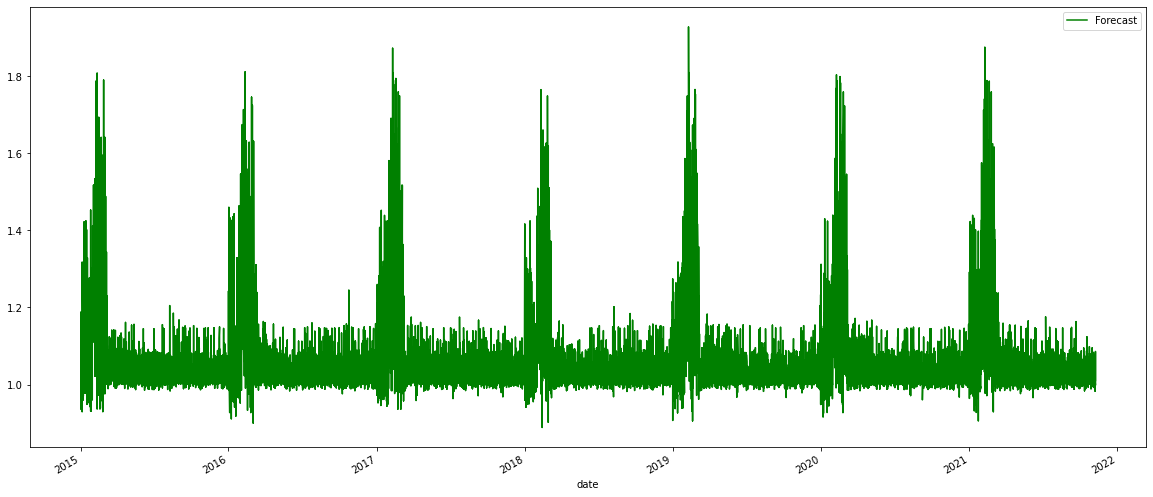

In [ ]:
forecast = pd.DataFrame({"date":test["date"],
                        "ORGANIZATION_x":test["ORGANIZATION_x"],
                        "SPECIALITY":test["SPECIALITY"],
                         "ENCOUNTERCLASS":test["ENCOUNTERCLASS"],
                        "demand":test_preds
                        })

forecast.set_index("date").demand.plot(color = "green", figsize = (20,9),
                                       legend=True, label = "Forecast");

In [ ]:
forecast[["date","SPECIALITY","demand"]].loc[forecast.date >= "2021-01-01"]


,date,SPECIALITY,demand
56039,2021-05-22,0.0,1.001472
54736,2021-03-01,11.0,0.975723
56288,2021-06-11,8.0,1.002046
57361,2021-09-17,33.0,1.003476
55751,2021-05-04,57.0,0.998700
...,...,...,...
55864,2021-05-10,35.0,0.991126
56145,2021-05-31,38.0,0.996367
55234,2021-04-04,55.0,1.005165
56126,2021-05-30,62.0,0.985420


In [ ]:
forecast.SPECIALITY.value_counts()

35.0    362
50.0    353
5.0     351
10.0    348
41.0    347
       ... 
19.0    290
6.0     287
28.0    283
27.0    281
60.0    280
Name: SPECIALITY, Length: 65, dtype: int64

In [ ]:
forecast = forecast.sort_values(by=["date","SPECIALITY", "ENCOUNTERCLASS"])

In [ ]:
forecast = forecast.loc[forecast.date>="2021-01-01"]

In [ ]:
import math

In [ ]:
forecast.demand = forecast.demand.apply(math.ceil)

In [ ]:
encounters_orginal.ENCOUNTERCLASS.unique()

array(['wellness', 'ambulatory', 'outpatient', 'emergency', 'inpatient',
       'urgentcare'], dtype=object)

  'wellness',   0
  'ambulatory', 1
  'outpatient', 2
  'emergency',  3
  'inpatient',  4
  'urgentcare'  5

In [ ]:
emergency = forecast.loc[(forecast.ENCOUNTERCLASS == 1) | (forecast.ENCOUNTERCLASS == 3) | (forecast.ENCOUNTERCLASS == 5)]

In [ ]:
emergency.ENCOUNTERCLASS.unique()

array([3., 1., 5.])

In [ ]:
forecast.SPECIALITY.unique()

array([ 0.,  1., 24., 35., 36., 38., 51., 63.,  3., 16., 31., 37., 40.,
       48., 58., 61., 14., 20., 29., 34., 46., 50.,  7.,  9., 17., 30.,
       39., 53., 55., 59., 60., 25., 32., 62.,  4.,  8.,  6., 12., 21.,
       27., 42., 18., 19., 23., 43., 44., 57., 33., 41., 47., 54., 13.,
       45., 28., 64., 15., 52., 56., 26.,  5., 11., 22., 49.,  2., 10.])

In [ ]:
emergency.date = pd.to_datetime(emergency.date)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [ ]:
pd.concat([forecast.date,emergency.date]).drop_duplicates(keep=False)

Series([], Name: date, dtype: datetime64[ns])

In [ ]:
 pd.Timestamp("2021-01-01") in emergency.date.unique()

True

In [ ]:
sorted(forecast.SPECIALITY.unique())

[0.0,
 1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 28.0,
 29.0,
 30.0,
 31.0,
 32.0,
 33.0,
 34.0,
 35.0,
 36.0,
 37.0,
 38.0,
 39.0,
 40.0,
 41.0,
 42.0,
 43.0,
 44.0,
 45.0,
 46.0,
 47.0,
 48.0,
 49.0,
 50.0,
 51.0,
 52.0,
 53.0,
 54.0,
 55.0,
 56.0,
 57.0,
 58.0,
 59.0,
 60.0,
 61.0,
 62.0,
 63.0,
 64.0]

In [ ]:
em = []
column = []
for j in sorted(forecast.SPECIALITY.unique()):
  if j in emergency.SPECIALITY.tolist():
    for k in forecast.date.unique():
      if pd.Timestamp(k) not in emergency.loc[emergency.SPECIALITY == j].date.unique():
        column.append(0)
      else:
        column.append(int(emergency.loc[(emergency.date==k) & (emergency.SPECIALITY ==j)].demand.values[0]))
    em.append(column)
    column=[]
  else:
    em.append([0] * len(forecast.date.unique()))
    column=[]

print(em)
em = pd.DataFrame(em)
em.to_excel("emergency_demand.xlsx")

[[2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 2, 0, 1, 2, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [ ]:
non_emergency = forecast.loc[(forecast.ENCOUNTERCLASS == 2) | (forecast.ENCOUNTERCLASS == 4)]

In [ ]:
forecast.SPECIALITY.nunique()

65

In [ ]:
len([0] * len(forecast.SPECIALITY.unique()))

65

In [ ]:
nem = []
column = []
for j in sorted(forecast.SPECIALITY.unique()):
  if j in non_emergency.SPECIALITY.tolist():
    for k in forecast.date.unique():
      if pd.Timestamp(k) not in non_emergency.loc[non_emergency.SPECIALITY == j].date.unique():
        column.append(0)
      else:
        column.append(int(non_emergency.loc[(non_emergency.date==k) & (non_emergency.SPECIALITY ==j)].demand.values[0]))
    nem.append(column)
    column=[]
  else:
    nem.append([0] * len(forecast.date.unique()))
    column=[]

nem = pd.DataFrame(nem)
nem.to_excel("non_emergency_demand.xlsx")

In [ ]:
len(forecast.SPECIALITY.unique())

65

In [ ]:
cjk = np.ones((len(forecast.SPECIALITY.unique()), (len(forecast.date.unique()))))

cjk = pd.DataFrame(cjk)
cjk.to_excel("max_cjk.xlsx")

In [ ]:
p = [[7,1,2,3,4,5,6],
 	  [6,7,1,2,3,4,5],
 	  [5,6,7,1,2,3,4],
 	  [4,5,6,7,1,2,3],
 	  [3,4,5,6,7,1,2],
 	  [2,3,4,5,6,7,1],
 	  [1,2,3,4,5,6,7]]

p = np.resize(p, (len(forecast.date.unique()), (len(forecast.date.unique()))))

p = pd.DataFrame(p)
print(p.shape)
p.to_excel("pjk.xlsx")

(313, 313)


## *from dataframe to matrix*

In [ ]:
# row = []
# column = []
# for y in forecast.date.unique():
#   if pd.Timestamp(y) in non_emergency.date.unique():
#     for i in range(0,len(forecast.SPECIALITY.unique())):
#       if i not in forecast.loc[forecast.date == y].SPECIALITY.tolist():
#         column.append(0)
#       else:
#         column.append(int(forecast.loc[(forecast.date==y) & (forecast.SPECIALITY ==i)].demand.values[0]))
#     row.append(column)
#     print(len(column))
#     print(len(row))
#     column=[]

# print(row)

In [ ]:
!ls

demand.xlsx	       max_cjk.xlsx		  patients.csv	  providers.csv
emergency_demand.xlsx  non_emergency_demand.xlsx  pjk.xlsx	  supplies.csv
encounters.csv	       observations.csv		  procedures.csv


In [ ]:
demand = pd.DataFrame(row)
demand.to_excel("demand.xlsx")

NameError: ignored

# OR Model

PERFORMED IN CPLEX

In [ ]:
!pip install docplex

In [ ]:
from docplex.cp.model import CpoModel, INTERVAL_MIN

#create model

mdl = CpoModel()

Data needed?
cjk = maximum number of operating rooms that can be used?
A[i] = number of operating rooms i
S = Amount of staff hours per day (24)
beta = 1


In [ ]:
p =

In [ ]:
supplies.DESCRIPTION.value_counts()

## Variables and Sets

In [ ]:
organizations = providers.groupby(["ORGANIZATION","SPECIALITY"]).size().reset_index(name="Counts")

In [ ]:
providers.groupby(["ORGANIZATION","SPECIALITY"]).sum()

In [ ]:
providers

In [ ]:
providers.groupby(["Id","ORGANIZATION","SPECIALITY"]).sum()

In [ ]:
from collections import namedtuple

In [ ]:
# subclass the namedtuple to refine the str() method as the nurse's name
class org(namedtuple("Org1", ["ORGANIZATION", "SPECIALITY", "Counts"])):
    """ A subclass to redefine the default str() of namedtuple.
    This class is used in variable naming, so we need to redefine the str() method
    used by variable naming.
    """

    def __str__(self):
        return self.ORGANIZATION
class providers(namedtuple("Org1", ["ORGANIZATION", "SPECIALITY", "Counts"])):
    """ A subclass to redefine the default str() of namedtuple.
    This class is used in variable naming, so we need to redefine the str() method
    used by variable naming.
    """

    def __str__(self):
        return self.ORGANIZATION


In [ ]:
org = [org(organizations["ORGANIZATION"][i],organizations["SPECIALITY"][i],organizations["Counts"][i]) for i in range(len(organizations))]

In [ ]:
# CREATE VARIABLES
#Set of Room Types
I = providers.ORGANIZATION.unique()
#Set of Medical Specialties
J = providers.SPECIALITY.nunique()
#Set of days
D = 5
#index for room type,
#A room can be considered
#different due to location or medical equipment
i = range(I)
#index for medical specialty
j = range(J)
#indices for days
k,l = range(D)
#Amount of Staff hours per day
S = namedtuple("MaxTime", ["work_time_max"])
# number of operating rooms of type i
a = providers.SPECIALITY
#emergency patients' surgery demand for
#specialty j on day k, measured in hours
e[j][k]
#non-emergency patients' (including inpatients & outpatients)
#surgery demand for specialty j on day k, measured in hours
O[j][k]
#the maximum number of operating rooms that speciality j
#can utilize on day k, determined by the number of surgeons and the amount
#of equipment or any other necessary medical resources that each specialty has
c[j][k]
#the number of days delayed if a surgery is populated from day k to day l
p[k][l]
#the equivalent number of days delayed if a surgery demand is not met in the model
#(or the penalty rate for unmet demand)
theta
#the penalty rate for undersupply of OR hours to a specialty, relative to a desired level
#determined by the percentage of total non-emergency surgery demand for each specialty,
#Inclusion of this penalty term in the objective function serves the purpose of smoothing the OR
#capacity. the beta value should be much smaller than theta. we find an optimal or good beta value
#by testing in a simulation model the templates determined by the MIP nidek with different beta values
beta

## DECISION VARIABLES

In [ ]:
def setup_variables(mdl):
  ######################################DECISION VARIABLES############################################
  #the number of operating rooms of type i allocated to specialty j on day k
  #--> determines allocation template 1 if yes, 0 o.w.
  mdl.Xijk = mdl.binary_var_cube(all_rooms, all_specialities, all_days, name="allocated j in i on k")
  #The amount of the emergency OR's staffed hours allocated to
  #specialty j on day k
  mdl.Yjk = mdl.continuous_var_matrix(all_specialities, all_days, name="hours of j on k")
  #specialty j's non-emergency demand postponed from day k to day l
  mdl.Zjkl = mdl.continuous_var_cube(all_specialities, all_days, all_days, name="postponed from k to l")
  #specialty j's unmet non-emergency demand on day k
  mdl.Ujk = mdl.continuous_var_matrix(all_specialities,all_days, name="unmet non from j on k")
  #the amount of idle time of the OR allocated to specialty j on day k
  mdl.Bjk = mdl.continuous_var_matrix(all_specialtiies, all_days, name="idle time from j on k")
  #the total amount of idel time of all rooms
  mdl.H = mdl.continuous_var(lb=0, name="Total idle time from all rooms")
  #oversupply of OR hours to specialty j relative to its desired level
  mdl.Pj = mdl.continuous_var_dict(all_specialities, name="oversupply of hours to j")
  #undersupply of OR hours to specialty j
  mdl.Qj = mdl.continuous_var_dict(all_specialities, name="undersupply of hours to j")
